In [1]:
#libraries used for Lending club case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pandas might gives the warning, to avoide those warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data from csv into dataframe explicitly changing the datatype
loan=pd.read_csv("G:\ML UPGRAD\Lending Club Case Study\loan.csv")

In [3]:
#overview of the dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#displaying the information about the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#displaying the statistical info of dataset . 
# 1. It shows that some columns has the NULL values for all rows, eg: num_tl_90g_dpd_24m
# 2. Some columns has few rows values which is missing. Eg: pub_rec_bankruptcies
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
#checking the null for all column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#dropping the NULL columns using dropna
#axis=1 for columns
#how='all' when all the row of a colmn are NULL
#inplace=False to get the copy of output for check 
loan=loan.dropna(axis=1,how='all',inplace=False)

In [8]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


There are certain columns which are not required for this casestudy as they have only one distinct value

In [9]:
#checking the statistics again
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


    - application_type are example of columns which has Only one type of value and these columns are not require

In [10]:
#After dropping the NULL columns, we will be using drop those columns having single distinct value
#axis=1 for columns
#how='all' when all the row of a colmn are NULL
#inplace=False to get the copy of output for check 
loan=loan.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'],
          axis=1,inplace=False)

In [11]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [12]:
#checking the remaing 48 columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  object 
 6   int_rate                  39717 non-null  object 
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  emp_title                 37258 non-null  object 
 11  emp_length                38642 non-null  object 
 12  home_ownership            39717 non-null  object 
 13  annual_inc                39717 non-null  float64
 14  verifi

##### Will keep only those column which are driving factors (or driver variables) behind loan default  and details of user such as emp_length and annual_income
#####  First we have to identify the driver variables first, then we will keep those in the dataset and rest we will drop from it.
1. There are still columns such as the `"id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"` not required for this analysis
2.  We have to remove the above mentioned columns from the dataset as they are irrelevent for casestudy

In [13]:
loan=loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"],axis=1,inplace=False)

In [14]:
loan.shape

(39717, 21)

#### As per the problem statement the applicant who's loan_status is "Current" those candidates are not labelled as 'defaulted'

In [15]:
#we will exculed those  loan_status equals to "Current" from the dataset
#first getting the unique values from a column to check
loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [16]:
#applying the condition to exclude the Current loan_status
loan=loan[loan["loan_status"]!='Current']

In [17]:
loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null  obje

#### Now we have removed the Current loan_status we will now handle the missing value 

" let's check the percentage of missing values for all column first "

In [19]:
'''
1. loan.isnull().sum() : we will get the count of NULL in each columns
2. len(loan.index) : 
   loan.index : return index of dataframe in an int array
   len : length of the array
'''
(loan.isnull().sum()/len(loan.index))*100


loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

''' 

We found below two columns which is having the NULL records
1. emp_length : more than 2% of rows are NULL, we will fill with mode value
2. revol_util : less than 0.5 % of rows are NULL, so deleting the NULL rows will be better options

'''

In [20]:
# we will check the  mode value of `emp_length` column in dataset
loan["emp_length"].mode()

0    10+ years
Name: emp_length, dtype: object

In [21]:
#checking  the frequency of mode value
loan["emp_length"].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

##### Since the mode is having higher frquency we will fill the missing value with mode

In [22]:
''' 1. loan[loan["emp_length"].isnull()==True] : we will get 1033 records where emp_length is NaN. so to fill one by one it will take time. 
                                                 hence we will use fillna() to fill Null gaps.
    2. loan["emp_length"].mode()[0]: It will fetch the sting from the mode
    and stored into loan["emp_length"] column only if we place loan instead of loan["emp_length"] entire dataset will be modified.
'''
loan["emp_length"]=loan["emp_length"].fillna(loan["emp_length"].mode()[0])

In [23]:
loan["emp_length"].isnull().sum()
#returns 0 i.e is all nulls handled

0

In [24]:
# Return the onlu those rows where revol_util is NULL.
loan[loan["revol_util"].isnull()==True]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
3565,8000,8000.000000,36 months,19.42%,294.95,E,E3,3 years,RENT,30000.0,...,Nov-11,Fully Paid,debt_consolidation,18.56,Sep-92,1,6,0,NaN,10
4714,6100,6100.000000,36 months,14.27%,209.29,C,C2,10+ years,MORTGAGE,23748.0,...,Nov-11,Charged Off,home_improvement,23.95,May-02,0,2,0,NaN,4
4943,7200,7200.000000,36 months,14.27%,247.03,C,C2,7 years,RENT,48000.0,...,Oct-11,Fully Paid,debt_consolidation,15.28,Mar-97,0,2,0,NaN,25
11282,5000,5000.000000,36 months,21.36%,189.31,F,F4,10+ years,MORTGAGE,35000.0,...,Jul-11,Fully Paid,home_improvement,21.91,Dec-07,2,2,0,NaN,5
12042,3000,3000.000000,60 months,22.11%,83.05,G,G1,6 years,OWN,17652.0,...,Jul-11,Charged Off,other,0.00,Jan-08,0,3,0,NaN,5
12147,4275,4275.000000,36 months,15.99%,150.28,D,D2,7 years,MORTGAGE,54500.0,...,Jul-11,Fully Paid,home_improvement,7.49,Jun-05,0,2,0,NaN,9
13891,2000,1900.000000,36 months,18.39%,72.70,E,E2,1 year,RENT,24000.0,...,Jun-11,Charged Off,other,22.60,May-06,3,3,0,NaN,16
17985,20000,4575.003440,60 months,20.48%,535.24,G,G2,10+ years,RENT,42000.0,...,Mar-11,Charged Off,debt_consolidation,18.91,Oct-96,2,3,0,NaN,18
18184,1825,1825.000000,36 months,12.68%,61.22,C,C1,< 1 year,RENT,19200.0,...,Mar-11,Fully Paid,major_purchase,16.81,Nov-06,0,7,0,NaN,11
21604,2500,2500.000000,36 months,16.69%,88.75,E,E3,7 years,RENT,27024.0,...,Dec-10,Fully Paid,debt_consolidation,5.24,Jan-06,0,2,0,NaN,3


In [25]:
#~ negate of loan["revol_util"].isnull()==True means all those rows where revol_util is present
loan[~loan["revol_util"].isnull()==True]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,...,Jul-07,Fully Paid,home_improvement,11.33,Nov-90,0,13,0,13.10%,40
39713,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,...,Jul-07,Fully Paid,credit_card,6.40,Dec-86,1,6,0,26.90%,9
39714,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,...,Jul-07,Fully Paid,debt_consolidation,2.30,Oct-98,0,11,0,19.40%,20
39715,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,...,Jul-07,Fully Paid,other,3.72,Nov-88,0,17,0,0.70%,26


In [26]:
# we will store only those records where the revol_util data is present in dataset
loan=loan[~loan["revol_util"].isnull()==True]

In [27]:
# last check if still we have any NULLs in any columns
loan.isnull().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

#### We will focus on standarization of the dataset now
1. We found that `int_rate` and `revol_util` has % symbol at the end we will remove that.
2. We will also remove Years at the end of the `emp_length` and Months from `term`.
3. Drop duplicates if any from dataset.

In [28]:
#To apply a function in a dataframe we will use .apply() function
#Inside .apply() we will call lamdba function
#The value of x will traverse from 0 till last index -1 ie -1-1=-2 position
loan["int_rate"].apply(lambda x: x[:-1])

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38527, dtype: object

In [29]:
#we will assign this to int_rate column again
loan["int_rate"]=loan["int_rate"].apply(lambda x: x[:-1])

In [30]:
loan["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38527, dtype: object

##### similarly for other columns

In [31]:
#remove % from the loan["revol_util"] columns
loan["revol_util"]=loan["revol_util"].apply(lambda x: x[:-1])

In [32]:
# remove years from the emp_length
# if emp_length < 1 years we consider it as 0
#if  emp_length is 10+ years we consider it as 10 only
loan["emp_length"]=loan["emp_length"].apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))

In [33]:
loan["emp_length"].value_counts()

emp_length
10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: count, dtype: int64

In [34]:
loan["term"].value_counts()

term
 36 months    29049
 60 months     9478
Name: count, dtype: int64

In [35]:
# there are spaces found in the 0th index, so the numericals in 1st index
loan["term"]=loan["term"].apply(lambda x: x.split(' ')[1])

In [36]:
loan["term"].value_counts()

term
36    29049
60     9478
Name: count, dtype: int64

'Remove the duplicates'

In [37]:
loan=loan.drop_duplicates()

In [38]:
loan.shape

(38527, 21)

##### Identifying and Handling outlines

In [39]:
#let's check the applicant's annual income 
loan["annual_inc"].describe()

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [40]:
loan["annual_inc"].mean()

68809.2286111039

In [41]:
loan["annual_inc"].median()

59000.0

[]

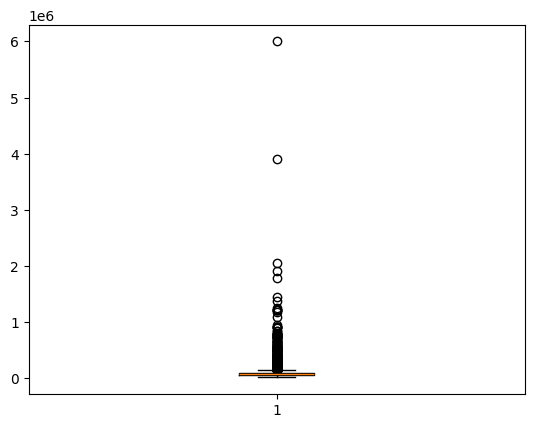

In [42]:
plt.boxplot(x=loan["annual_inc"])
plt.plot()

##### While looking into the mean , median and the max values, we can say that the difference between the max and mean or median is very high  due to the outlines.
##### We will first check the distribution of the different percentile

In [43]:
loan["annual_inc"].quantile([0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.99,1])

0.75      82000.0
0.80      90000.0
0.85     100000.0
0.90     115000.0
0.95     140004.0
0.96     150000.0
0.97     165000.0
0.99     234000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

--- We can see after 95 percent the values of annual salary seems to be very high , lets view this on a line chart---

<Axes: >

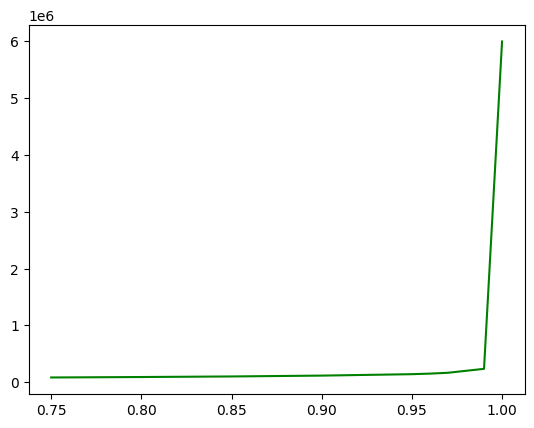

In [44]:
loan["annual_inc"].quantile([0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.99,1]).plot(color='g')

##### We can see that followings 
##### From 0.90 to 0.95 we have a very little increase
##### While from 0.99 to 1 there is a sharp spike so we will exclude 
##### From 0.96 to 0.99 we see a little increase, so we will exclude this as well

In [45]:
# we will analyze the annual_inc from 0.90 to 0.95  quantile 
loan["annual_inc"].quantile([0.90,0.91,0.92,0.93,0.94,0.95])

0.90    115000.0
0.91    120000.0
0.92    122000.0
0.93    127500.0
0.94    134176.0
0.95    140004.0
Name: annual_inc, dtype: float64

<Axes: >

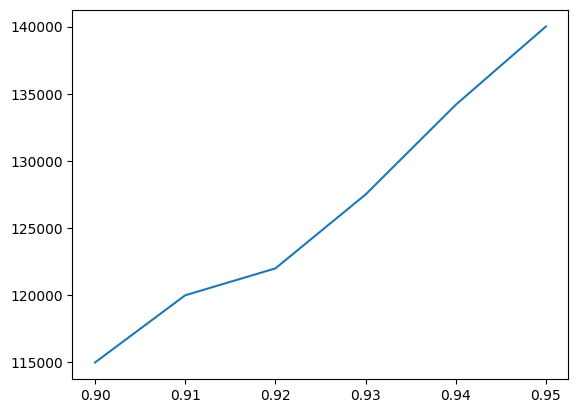

In [46]:
#Checking on the line graph again
loan["annual_inc"].quantile([0.90,0.91,0.92,0.93,0.94,0.95]).plot()

In [47]:
##### While checking the line graph  if we keep till 0.94 it will be fine

In [48]:
loan=loan[loan["annual_inc"]<=loan["annual_inc"].quantile(0.94)]

[]

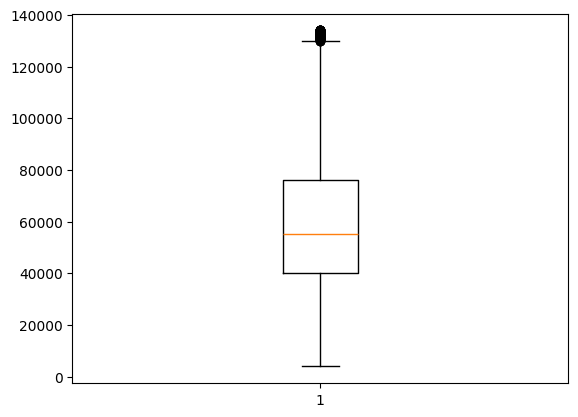

In [49]:
plt.boxplot(x=loan["annual_inc"])
plt.plot()

<Axes: xlabel='annual_inc'>

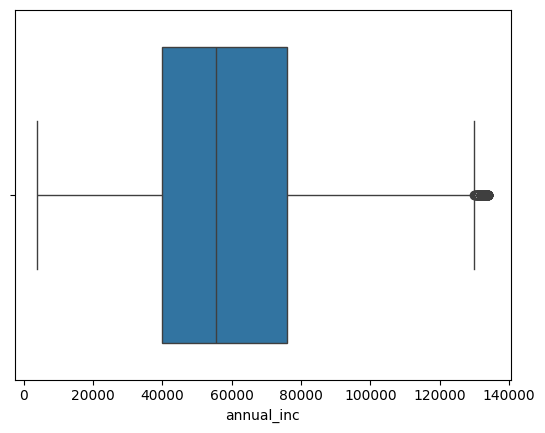

In [50]:
## boxplot using seaborn
loan["annual_inc"]=loan["annual_inc"].astype('int')
sns.boxplot(data=loan,x='annual_inc')

###### Handling outlines for other numerical columns

<Axes: ylabel='dti'>

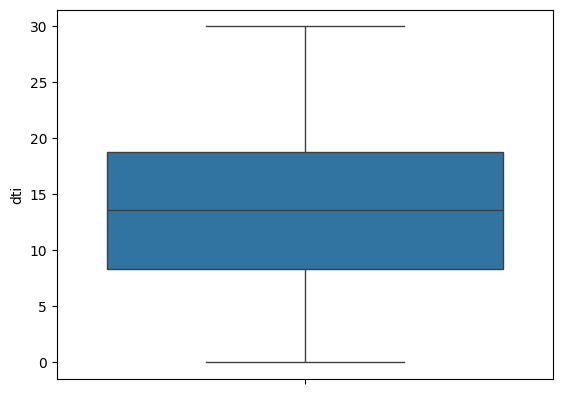

In [51]:
# checking for columns dti
sns.boxplot(loan["dti"])

[]

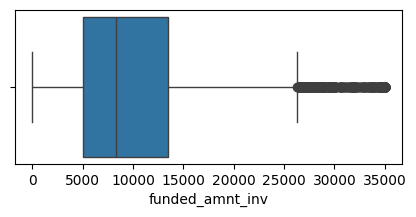

In [52]:
# checking the loan amount
plt.figure(figsize=[5,2])
sns.boxplot(x=loan["funded_amnt_inv"])
plt.plot()

[]

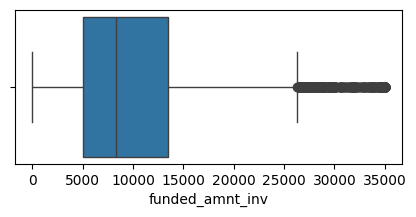

In [53]:
# checking the loan amount
plt.figure(figsize=[5,2])
sns.boxplot(x=loan["funded_amnt_inv"])
plt.plot()

<Axes: >

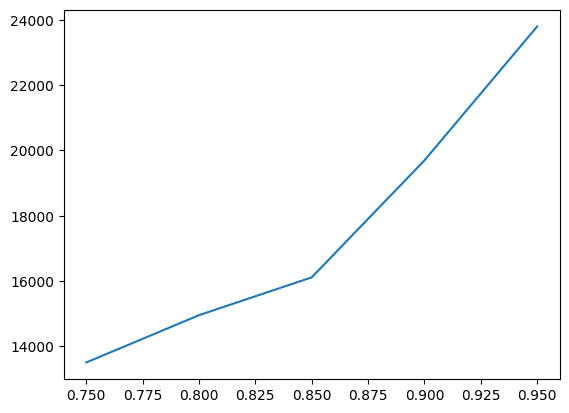

In [54]:
## check the distribution of for the outliners
quantile=np.arange(0.75,1,0.05)
loan["funded_amnt_inv"].quantile(quantile).plot()

remove the outliners

In [55]:
loan=loan[loan['funded_amnt_inv']<=20000]

[]

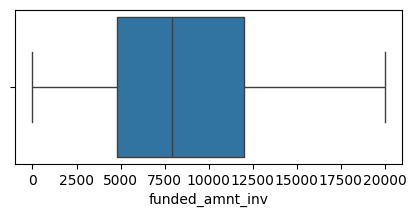

In [56]:
plt.figure(figsize=[5,2])
sns.boxplot(x=loan["funded_amnt_inv"])
plt.plot()

[]

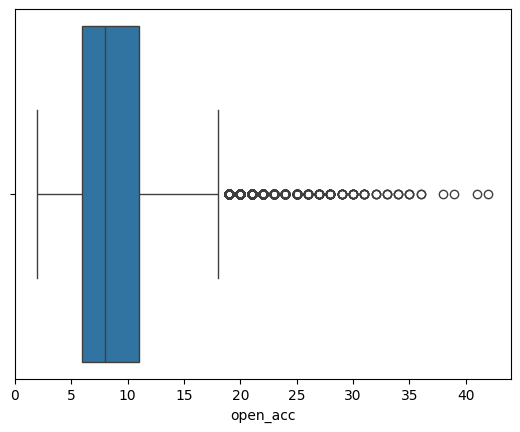

In [57]:
#outliners for open account
sns.boxplot(x=loan["open_acc"])
plt.plot()

##### We can see in the discontinuous value in the box plot

In [58]:
loan["open_acc"].describe()

count    33446.000000
mean         9.063655
std          4.336081
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         42.000000
Name: open_acc, dtype: float64

In [59]:
quantile=np.arange(0.75,1.0,0.01)
loan["open_acc"].quantile(quantile)

0.75    11.0
0.76    12.0
0.77    12.0
0.78    12.0
0.79    12.0
0.80    12.0
0.81    13.0
0.82    13.0
0.83    13.0
0.84    13.0
0.85    13.0
0.86    14.0
0.87    14.0
0.88    14.0
0.89    15.0
0.90    15.0
0.91    15.0
0.92    16.0
0.93    16.0
0.94    17.0
0.95    17.0
0.96    18.0
0.97    19.0
0.98    20.0
0.99    22.0
Name: open_acc, dtype: float64

Since the quantile distribution also shows some values close to each other, so it is difficult to remove any % of values. <BR>
Another way to look into it is lets see the %of distinct values of open_acc in dataset

<Axes: xlabel='loan_amnt'>

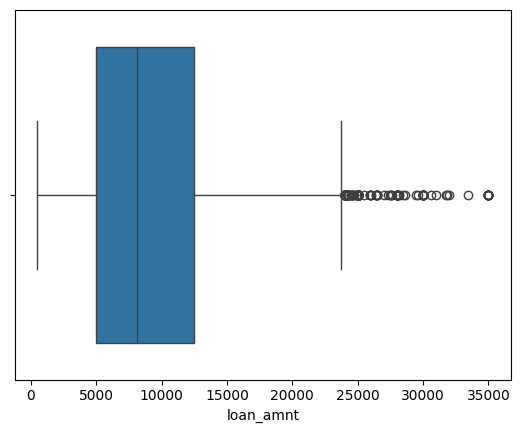

In [60]:
sns.boxplot(x=loan["loan_amnt"])

In [61]:
loan=loan[loan['loan_amnt']<22500]

<Axes: xlabel='loan_amnt'>

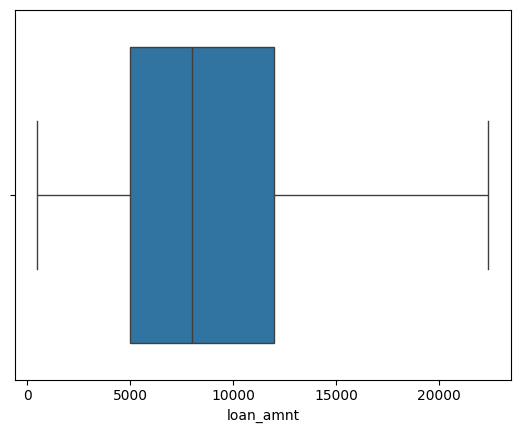

In [62]:
sns.boxplot(x=loan["loan_amnt"])

In [63]:
## 1. loan["open_acc"].value_counts() --Get the distinct values of open_acc in dataset
## 2. loan.index -- returns the array of index of type int
## 3. length of array
((loan["open_acc"].value_counts()/len(loan.index))*100)

open_acc
6     10.412747
7     10.382398
8     10.057663
9      9.317147
5      8.661608
10     7.805766
11     6.561457
4      6.418816
12     5.453718
13     4.552352
3      4.191199
14     3.465857
15     2.773900
16     2.127466
2      1.678300
17     1.672231
18     1.195751
19     0.886191
20     0.649469
21     0.549317
22     0.339909
23     0.221548
24     0.169954
25     0.145675
26     0.075873
28     0.057663
27     0.054628
30     0.024279
29     0.024279
31     0.018209
35     0.009105
32     0.009105
33     0.009105
34     0.009105
36     0.006070
39     0.003035
38     0.003035
41     0.003035
42     0.003035
Name: count, dtype: float64

In [64]:
## after 17, the values of other accounts is singnificantly low
## so we kee till 17 value ie till 0.95 percentage
loan=loan[loan['open_acc']<=loan['open_acc'].quantile(0.95)]

[]

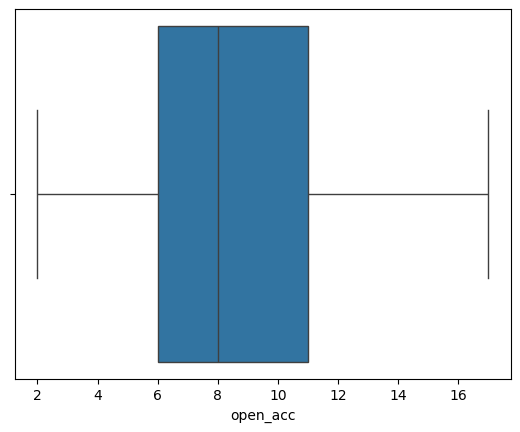

In [65]:
sns.boxplot(x=loan['open_acc'])
plt.plot()

[]

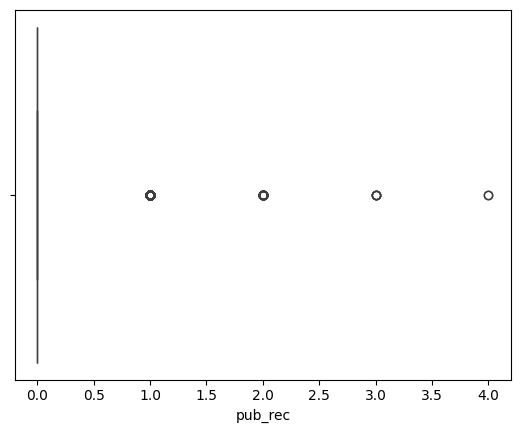

In [66]:
#outliners for public record
sns.boxplot(x=loan["pub_rec"])
plt.plot()

In [67]:
quantile=np.arange(0.75,1.0,0.01)
loan["pub_rec"].quantile(quantile)

0.75    0.0
0.76    0.0
0.77    0.0
0.78    0.0
0.79    0.0
0.80    0.0
0.81    0.0
0.82    0.0
0.83    0.0
0.84    0.0
0.85    0.0
0.86    0.0
0.87    0.0
0.88    0.0
0.89    0.0
0.90    0.0
0.91    0.0
0.92    0.0
0.93    0.0
0.94    0.0
0.95    1.0
0.96    1.0
0.97    1.0
0.98    1.0
0.99    1.0
Name: pub_rec, dtype: float64

In [68]:
loan["pub_rec"].describe()

count    31478.000000
mean         0.059597
std          0.245828
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [69]:
loan=loan[loan["pub_rec"]<=loan["pub_rec"].quantile(0.95)]

[]

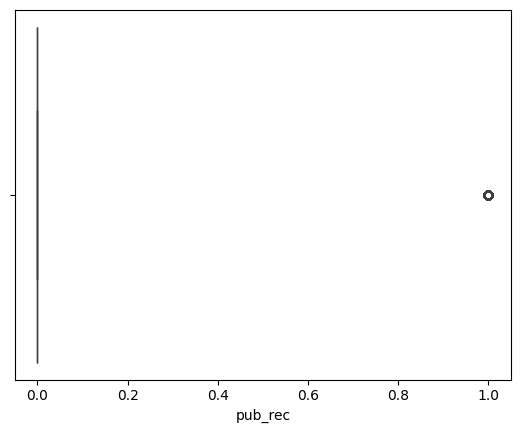

In [70]:
sns.boxplot(x=loan["pub_rec"])
plt.plot()

##### UNIVARIATE ANALYSIS

In [71]:
### Checking the subgrade column
loan["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'B3', 'A1', 'C2', 'D2', 'A3', 'A5', 'B4', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'E2', 'F5', 'F4', 'G3', 'G2', 'G1',
       'G4', 'G5'], dtype=object)

In [72]:
loan["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

We have lot more unique values in the sub_grade, it will be difficult to visualize if we plot the graph.
Lets try to simplify subgrade , first is a letter is character and 2nd position is a number.
first letter signifies a character and second letter is its level. So if we split the number 
and store it as new values for sub_grade by combining it with grade and sub_grade we get loan subgrade again.

In [73]:
## lets separate the number from the character
loan["sub_grade"]=loan["sub_grade"].apply(lambda x: x[1])

In [74]:
loan["sub_grade"].value_counts()

sub_grade
4    6589
3    6478
5    6338
2    6205
1    5819
Name: count, dtype: int64

##### Let's see the loan status column

In [75]:
loan["loan_status"].value_counts()

loan_status
Fully Paid     26996
Charged Off     4433
Name: count, dtype: int64

<p style="color:green;"><b>As per the problem statement the applicants `Charged Off` represents those applicants who has not paid the installments in due time for <br>
a long period of time i.e he/she has `DEFAULTED` the loan. So we will plot when loan_status='Charged Off'</p>

[]

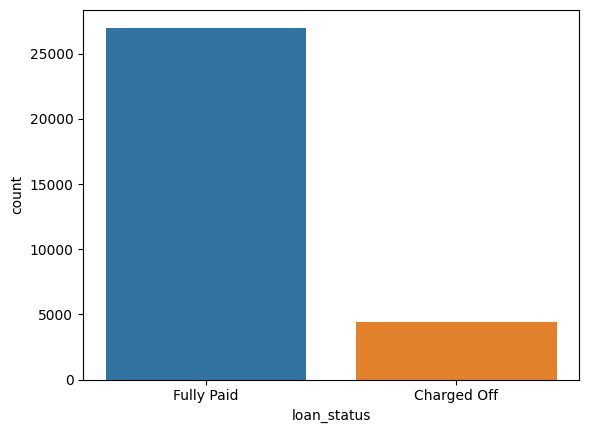

In [76]:
sns.countplot(x='loan_status',data=loan,palette=sns.color_palette())
plt.plot()

In [77]:
sorted_garde=loan.grade.sort_values().unique()

In [78]:
sorted_garde

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

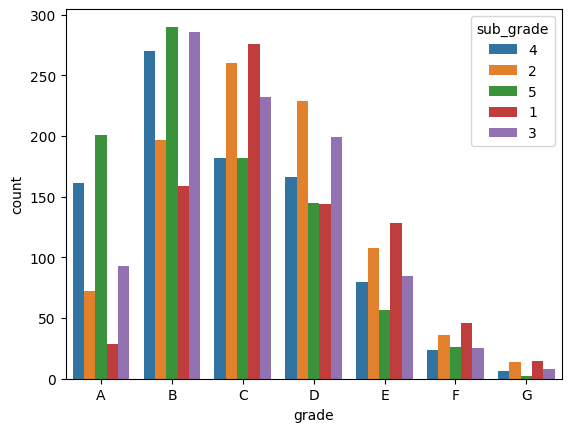

In [79]:
sns.countplot(data=loan[loan.loan_status=="Charged Off"],x="grade",hue="sub_grade",order=sorted_garde)

In [80]:
(loan[loan["loan_status"]=='Charged Off']["grade"].value_counts()/len(loan.index))*100

grade
B    3.824493
C    3.601769
D    2.809507
A    1.769067
E    1.457253
F    0.499539
G    0.143180
Name: count, dtype: float64

<Axes: xlabel='grade', ylabel='count'>

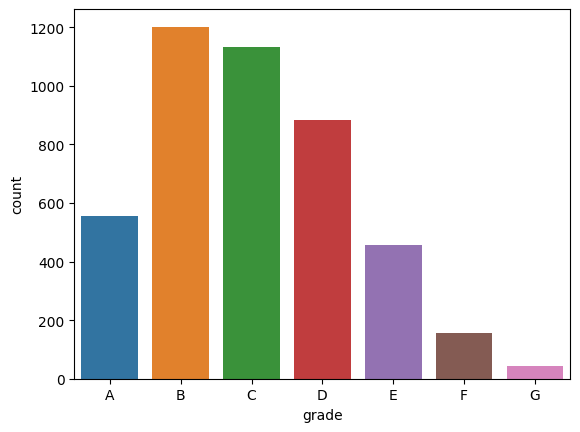

In [81]:
## People having the GRADED as B is more likely to be a faulty applicants
sns.countplot(data=loan[loan.loan_status=="Charged Off"],x="grade",order=sorted_garde,palette=sns.color_palette())

In [82]:
loan["home_ownership"].value_counts()

home_ownership
RENT        16238
MORTGAGE    12615
OWN          2489
OTHER          84
NONE            3
Name: count, dtype: int64

In [83]:
(loan["home_ownership"].value_counts()/len(loan.index))*100

home_ownership
RENT        51.665659
MORTGAGE    40.138089
OWN          7.919437
OTHER        0.267269
NONE         0.009545
Name: count, dtype: float64

##### last two values `NONE` contributes very less, we can remove it

In [84]:
loan=loan[loan["home_ownership"] != "NONE"]

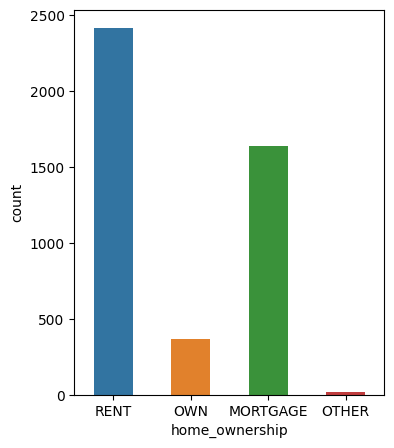

In [85]:
## People having the home ownership as RENT and MORTGAGE is more likely to be a faulty applicants
plt.figure(figsize=[4,5])
sns.countplot(data=loan[loan.loan_status=='Charged Off'],x="home_ownership",width=0.5,palette=sns.color_palette())
plt.show()

In [86]:
### Checking the purpose of loan
(loan[loan["loan_status"]=='Charged Off']['purpose'].value_counts()/len(loan.index))*100

purpose
debt_consolidation    6.765099
other                 1.692866
credit_card           1.358748
small_business        1.065996
home_improvement      0.817794
major_purchase        0.623687
car                   0.464583
medical               0.276841
moving                0.270477
wedding               0.257748
educational           0.162286
vacation              0.149558
house                 0.149558
renewable_energy      0.050913
Name: count, dtype: float64

[]

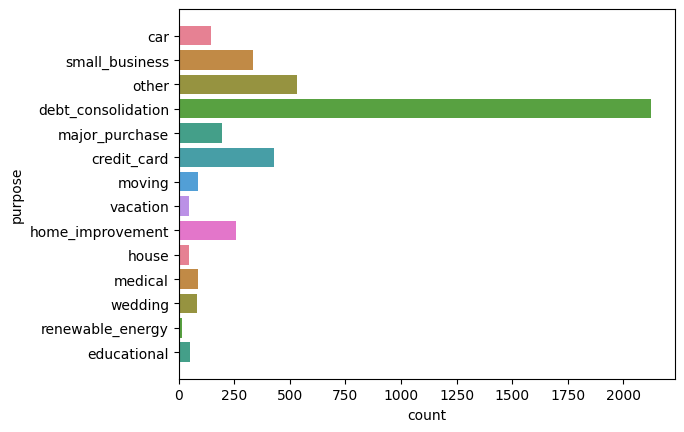

In [87]:
## More people took a new loan to clear up the old loans, this kinds of applicants having high possibility they might default the loan.
color_p=sns.color_palette("husl", 9)
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],y='purpose',palette=color_p)
plt.plot()

In [88]:
## We have lots of values for interest rate and it will going to difficult for us to analyze
loan["int_rate"].value_counts()

int_rate
10.99    744
7.51     716
11.49    652
7.88     652
13.49    591
        ... 
21.48      1
24.40      1
22.94      1
17.44      1
15.01      1
Name: count, Length: 358, dtype: int64

In [89]:
loan["int_rate"]=loan["int_rate"].astype("float")

##### We will be creating buckets using qcuts and convert into categories

In [90]:
loan['int_rate_category']=pd.qcut(x=loan['int_rate'],q=5,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

[]

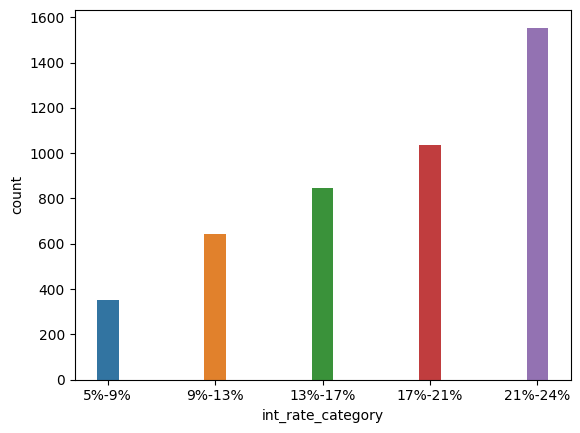

In [91]:
## Applicants having the higher interest rate in loan are more likely to be defaulter. 
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x='int_rate_category',width=0.2,palette=sns.color_palette())
plt.plot()

In [92]:
### Applicants annaul income
loan['annual_inc'].sort_values().unique()

array([  4000,   4080,   4200, ..., 133800, 133900, 134000])

In [93]:
loan['annual_inc'].quantile([0.2,0.4,0.6,0.8,1])

0.2     35000.0
0.4     47000.0
0.6     60000.0
0.8     78000.0
1.0    134000.0
Name: annual_inc, dtype: float64

In [94]:
loan['annual_inc_category']=pd.qcut(x=loan['annual_inc'],q=5,labels=['0-36k','36-50k','50-63k','63-82k','82-134K'])

<Axes: xlabel='annual_inc_category', ylabel='count'>

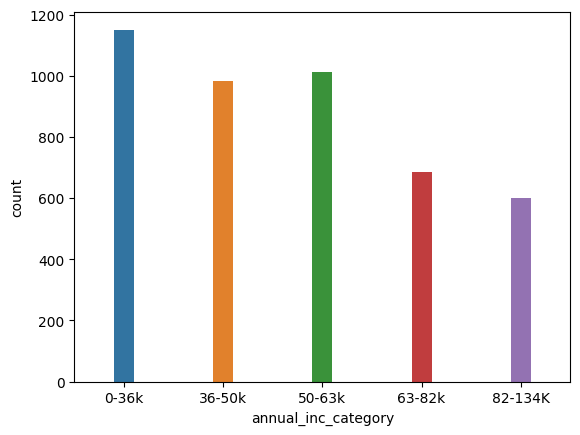

In [95]:
## By looking at the plot , it seems higher the annual income lower the chance of getting default.
## the count of applicants fall under 0-36k. Its seems there is other factors affecting more than annual income.
### we will get to know more about Bi variate annalysis.
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x='annual_inc_category',width=0.2,palette=sns.color_palette())

##### open accounts

In [96]:
loan['open_acc']=loan['open_acc'].astype("int")

In [97]:
## Created bins for open_accounts
loan['open_acc_groups'] = pd.qcut(x=loan['open_acc'],q=5,labels=['1-4','5-8','8-11','11-14','14-17'])

In [98]:
loan[loan["loan_status"]=='Charged Off'].groupby(['open_acc_groups'])['open_acc'].count()

open_acc_groups
1-4      1050
5-8       944
8-11      889
11-14     880
14-17     670
Name: open_acc, dtype: int64

[]

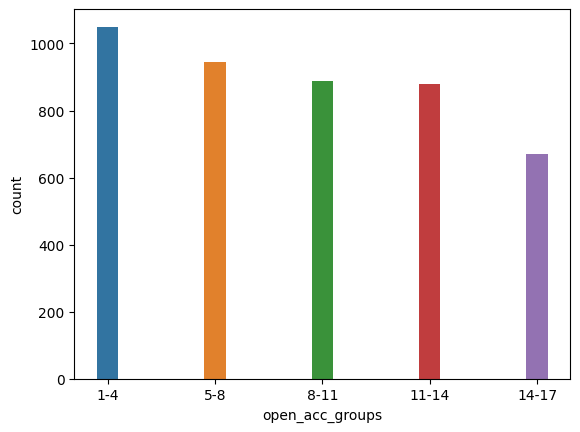

In [99]:
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x='open_acc_groups', width=0.2,palette=sns.color_palette())
plt.plot()

In [100]:
## Those applicants having oppen_accounts between 1-4 having higher chances of getting default
loan[loan["loan_status"]=='Charged Off']['open_acc_groups'].value_counts().sort_index()

open_acc_groups
1-4      1050
5-8       944
8-11      889
11-14     880
14-17     670
Name: count, dtype: int64

##### revolving utilization 

In [101]:
### revol_util varies from 0 -100
loan["revol_util"]=loan["revol_util"].astype("float")
loan["revol_util"].quantile([0.2,0.4,0.6,0.8,1])

0.2    19.9
0.4    39.7
0.6    58.1
0.8    77.3
1.0    99.9
Name: revol_util, dtype: float64

In [102]:
loan["revol_util"]=loan["revol_util"].astype('float')

In [103]:
loan["revol_util_category"]=pd.qcut(x=loan["revol_util"],q=4,labels=['0-21','21-42','42-78','78-104'])

<Axes: xlabel='revol_util_category', ylabel='count'>

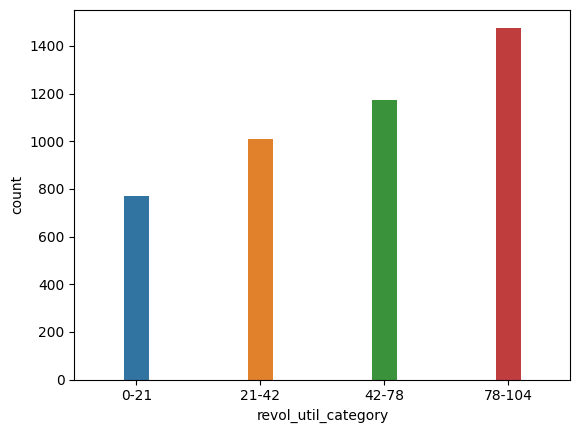

In [104]:
## Higher the  revolving utilization rate more chances of getting default.
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x='revol_util_category',width=0.2,palette=sns.color_palette())

##### terms

<Axes: xlabel='term', ylabel='count'>

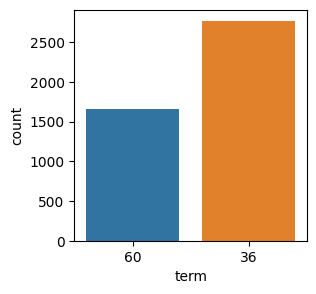

In [105]:
plt.figure(figsize=[3,3])
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x="term",palette=sns.color_palette())

##### verification_status

<Axes: xlabel='verification_status', ylabel='count'>

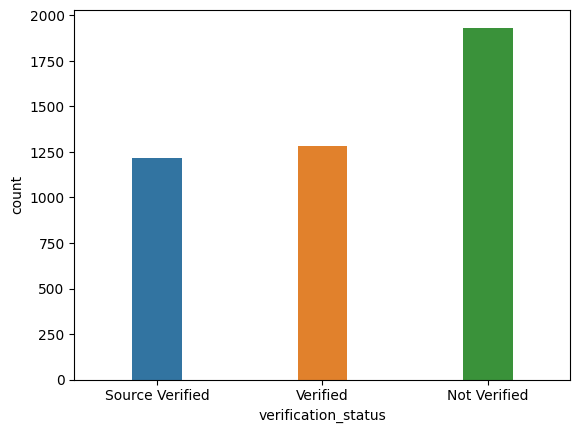

In [106]:
## Mostly applicants whose income was not verified and provided the loan are more likely to be present in the defaulter list
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x="verification_status",width=0.3,palette=sns.color_palette())

##### Public records

<Axes: xlabel='pub_rec', ylabel='count'>

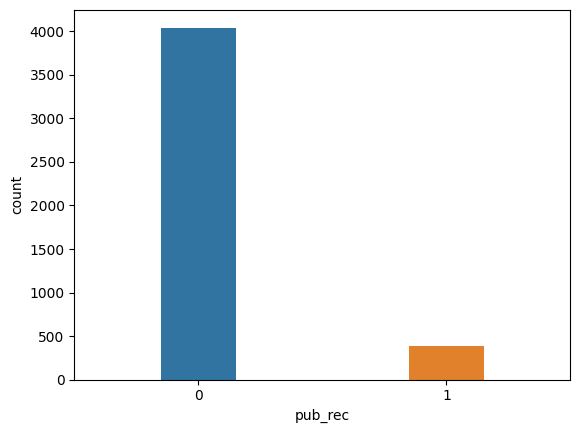

In [107]:
## It seems more number of people falls under defaulter list doesnot have previous derogatory public records
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x="pub_rec",width=0.3,palette=sns.color_palette())

##### inq_last_6mths

<Axes: xlabel='inq_last_6mths', ylabel='count'>

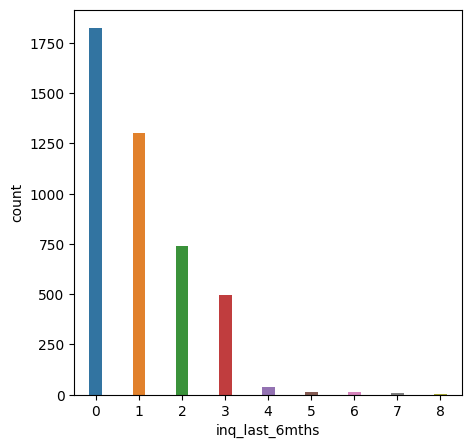

In [108]:
### People/Applicants making less enquiries are less likely to reutrn the loan amount.
fig,ax = plt.subplots(figsize = (5,5))
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x="inq_last_6mths",width=0.3,palette=sns.color_palette())

##### issue date

In [109]:
##As per the datails mentioned the loan provided from year 2007 to 2011
## So we will seperate month and year from issue_d
## extract month from issue_d
loan["issue_month"]=loan["issue_d"].apply(lambda x: x.split("-")[0])

In [110]:
## extract year from issue_d and string concat with 20
loan["issue_year"]=loan["issue_d"].apply(lambda x: '20'+x.split("-")[1])

<Axes: xlabel='issue_year', ylabel='count'>

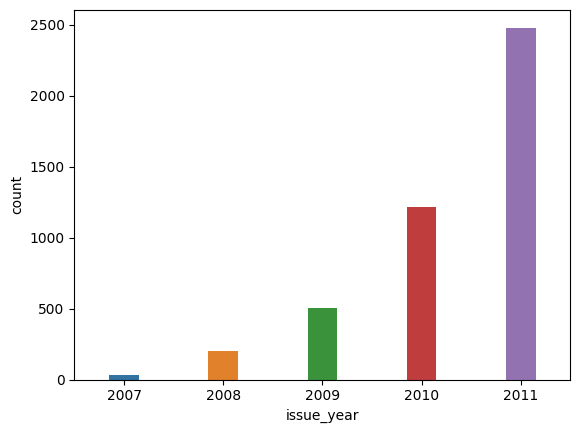

In [111]:
## As the year goes the number of loan applicants increases hence more number falls under defaulter list. 
##So year 2011 has highest loan defaulters compared to previous year.
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x="issue_year",width=0.3,order=loan["issue_year"].sort_values().unique(),palette=sns.color_palette())

<Axes: xlabel='issue_month', ylabel='count'>

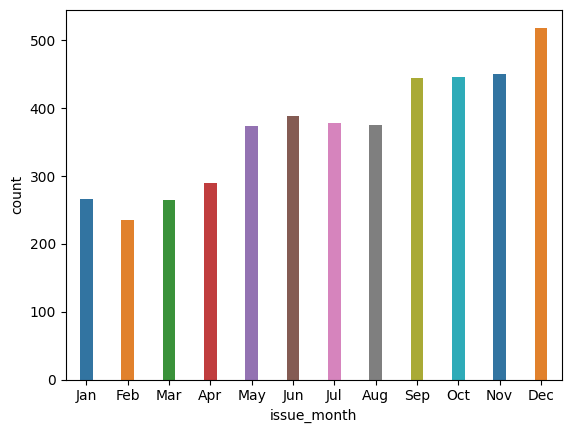

In [112]:
## most loans were sanctioned on the December Month
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x="issue_month",width=0.3,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],palette=sns.color_palette())

In [113]:
## dti
loan["dti"].describe()

count    31426.000000
mean        13.211784
std          6.677717
min          0.000000
25%          8.040000
50%         13.285000
75%         18.500000
max         29.990000
Name: dti, dtype: float64

In [114]:
loan["dti"].quantile([0.25,0.5,0.75,1])

0.25     8.040
0.50    13.285
0.75    18.500
1.00    29.990
Name: dti, dtype: float64

In [115]:
loan["dti_category"]=pd.qcut(x=loan["dti"],q=4,labels=['0-8','8-14','14-19','19-30'])

<Axes: xlabel='dti_category', ylabel='count'>

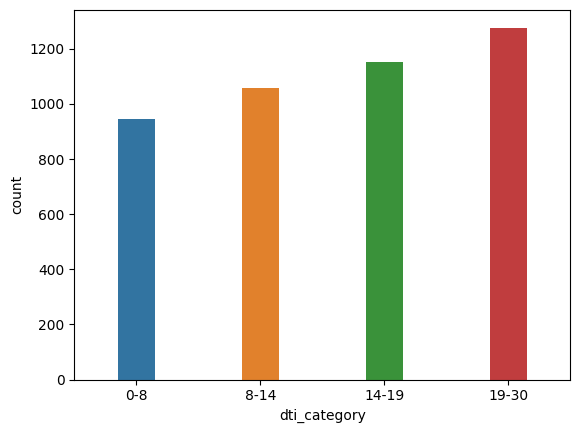

In [116]:
## higher the debt-to-income higher is the chances of getting default
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x="dti_category",width=0.3,palette=sns.color_palette())

##### funded_amnt_inv

In [117]:
loan['funded_amnt_inv_group'] = pd.qcut(x=loan['funded_amnt_inv'], q=4,labels=['0-5k','5k-10k','10k-15k','15k-20k'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

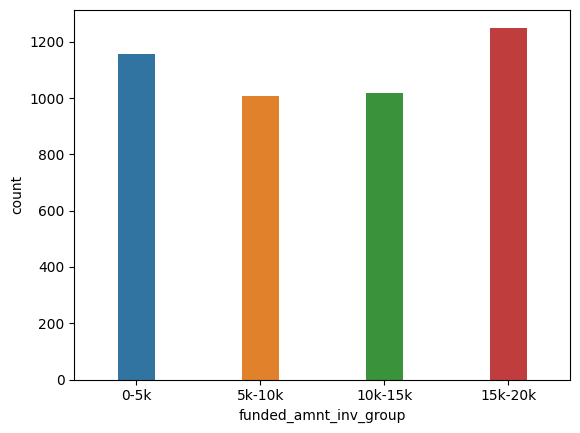

In [118]:
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x="funded_amnt_inv_group",width=0.3,palette=sns.color_palette())

##### installment

In [119]:
loan["installment"].describe()

count    31426.000000
mean       269.153457
std        149.436521
min         15.690000
25%        155.380000
50%        246.440000
75%        361.920000
max        804.100000
Name: installment, dtype: float64

In [120]:
loan["installment_range"]=pd.qcut(x=loan["installment"],q=4,labels=['0-161','161-266','266-404','404-1305'])

<Axes: xlabel='installment_range', ylabel='count'>

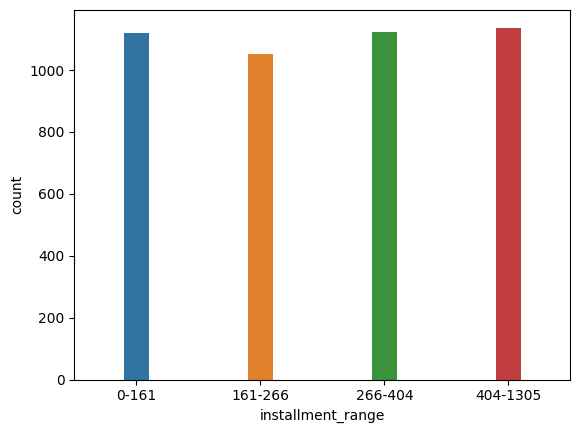

In [121]:
## We can see a trend theat higher the installment amount can leads applicants to the defaulter 
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'], x='installment_range',width=0.2,palette=sns.color_palette())

In [122]:
loan["emp_length"]=loan["emp_length"].astype("int")

<Axes: xlabel='emp_length', ylabel='count'>

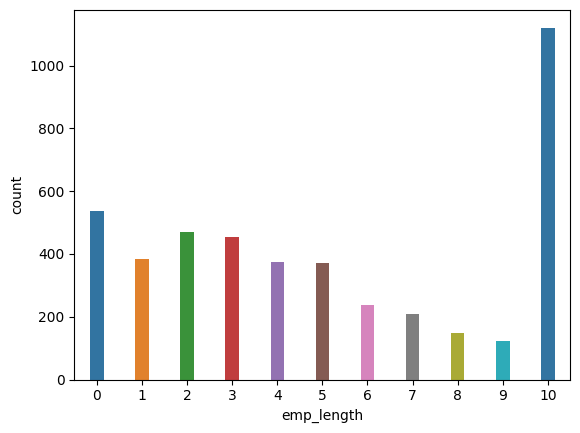

In [123]:
## Major numbers of applicants who's are in the defaulter list having Employment length  equals to 10 
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x="emp_length",width=0.3,order=loan["emp_length"].sort_values().unique(),palette=sns.color_palette())

In [124]:
loan["loan_amnt_category"]=pd.qcut(x=loan["loan_amnt"],q=5,labels=['0-5k','5-10k','10-15k','15-20k','20-25k'])

<Axes: xlabel='loan_amnt_category', ylabel='count'>

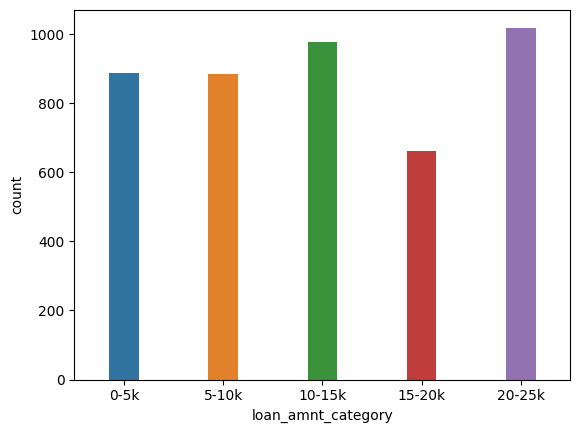

In [125]:
sns.countplot(data=loan[loan["loan_status"]=='Charged Off'],x='loan_amnt_category',width=0.3,palette=sns.color_palette())

##### Observations After Univariate Analysis
##### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :

1. People having the home ownership as RENT and MORTGAGE is more likely to be a faulty applicants.
2. More people tooks new loan to clear up the old loans, this kinds of apllicatnts having high possibility they might default the loan i.e purpose is 'debt_consolidation'
3. Applicants having the higher interest rate in laon are more likely to be defaulter, interest_rate ranges from 21-24 %.
4. Applicants whoes annual income is in 0-36k range having high possibility to become an defaulter.
5. Those applicants having oppen_accounts between 1-4 having higher chances of getting default.
6. Higher the  revolving utilization rate more chances of getting default i.e 78-104.
7. People taking loans for short period of time i.e short terms more likely to be falls under defaulter i.e 36 months
8. Mostly applicants whose income was `not verified` and provided the loan are more likely to be present in the defaulter list
9. It seems more number of people falls under defaulter list doesnot have previous derogatory public records i.e pub_rec=0
10. People/Applicants making less enquiries are less likely to reutrn the loan amount i.e inq_last_6mths=0
11. From issue_d column we say that more number of people falls under defaulter list is in the December month in year 2011.
12. Higher the debt-to-income(dti) ratio of an applicant higher is the chances of getting default.
13. When funded amount by investor is between 15-20k
14. We can see a trend theat higher the installment amount can leads applicants to the defaulter i.e 404-1305
15. Major numbers of applicants who's are in the defaulter list having Employment length  equals to 10 
16. Applicants whose loan Grade is B assigned by LC are more likely to be  a defaulter.
17. Applicants whose loan subGrade is B5 assigned by LC are more likely to be  a defaulter.
18. Applicants who opt for loan_amnt between 20-25k are more likely to be  a defaulters.

#### BIVARIATE ANALYSIS

##### Compute the correlation matrix between all the numericals columns in the dataframe

In [126]:
n_cols = ['loan_amnt','funded_amnt_inv','revol_util','emp_length','open_acc','int_rate','installment','annual_inc','dti','pub_rec']

In [127]:
loan[n_cols].corr()

,loan_amnt,funded_amnt_inv,revol_util,emp_length,open_acc,int_rate,installment,annual_inc,dti,pub_rec
loan_amnt,1.000000,0.920015,0.070161,0.091070,0.168776,0.180681,0.929366,0.310215,0.085782,-0.025333
funded_amnt_inv,0.920015,1.000000,0.075425,0.108750,0.155312,0.187181,0.874951,0.290111,0.093886,-0.029979
revol_util,0.070161,0.075425,1.000000,0.002401,-0.080160,0.481590,0.104540,0.039692,0.279997,0.060298
emp_length,0.091070,0.108750,0.002401,1.000000,0.077599,-0.045503,0.063438,0.150328,0.047767,0.082015
open_acc,0.168776,0.155312,-0.080160,0.077599,1.000000,-0.095667,0.153265,0.262278,0.298710,0.014284
int_rate,0.180681,0.187181,0.481590,-0.045503,-0.095667,1.000000,0.170712,-0.023652,0.092338,0.111458
installment,0.929366,0.874951,0.104540,0.063438,0.153265,0.170712,1.000000,0.304673,0.071817,-0.023318
annual_inc,0.310215,0.290111,0.039692,0.150328,0.262278,-0.023652,0.304673,1.000000,-0.093748,0.003289
dti,0.085782,0.093886,0.279997,0.047767,0.298710,0.092338,0.071817,-0.093748,1.000000,-0.003346
pub_rec,-0.025333,-0.029979,0.060298,0.082015,0.014284,0.111458,-0.023318,0.003289,-0.003346,1.000000


##### Now we have a corelation matrix lets visualize this on heatmap


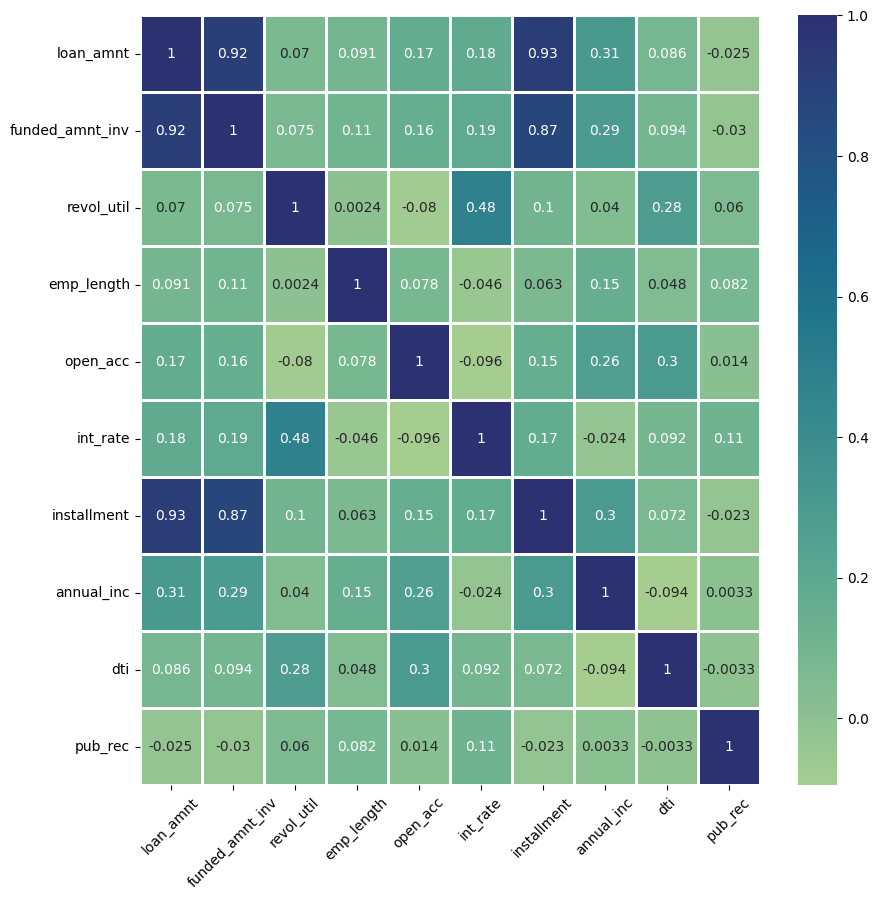

In [128]:
plt.figure(figsize=[10,10])
sns.heatmap(data=loan[n_cols].corr(),cmap="crest",linecolor='white',linewidths=1,annot=True)
plt.xticks(rotation=45)
plt.show()

##### 1.Loan Amount vs purpose

[]

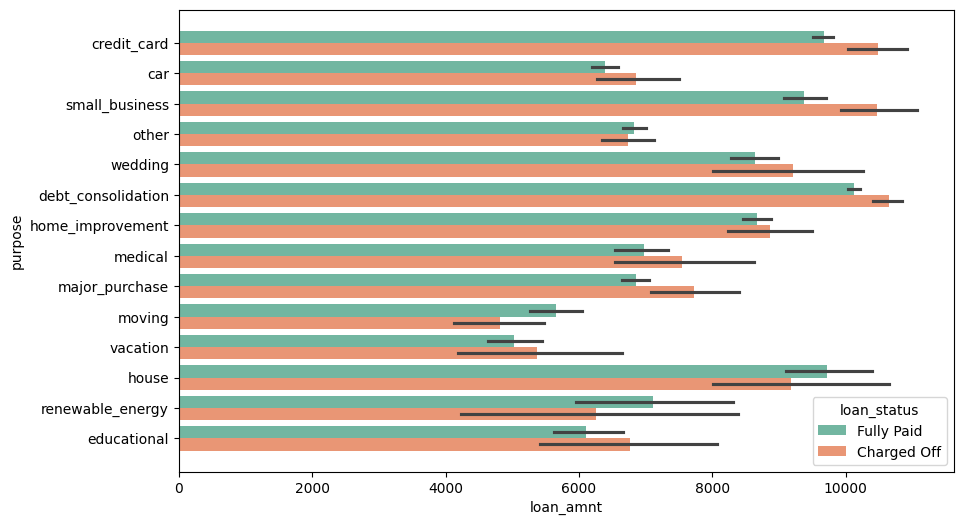

In [129]:
plt.figure(figsize=[10,6])
sns.barplot(data=loan,x='loan_amnt',y='purpose',orient='h',hue='loan_status',palette=sns.color_palette("Set2"))
plt.plot()

##### 2.Loan Amount vs home_ownership       

[]

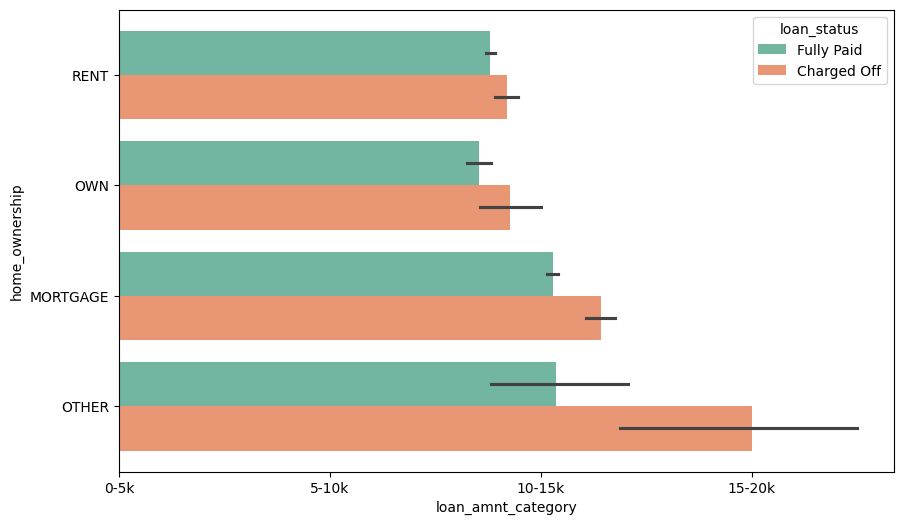

In [130]:
plt.figure(figsize=[10,6])
sns.barplot(data=loan,x='loan_amnt_category',y='home_ownership',orient='h',hue='loan_status',palette=sns.color_palette("Set2"))
plt.plot()

In [131]:
la1=loan[loan['loan_status']=='Charged Off'].pivot_table(index='loan_amnt_category',columns='home_ownership',values='loan_amnt',aggfunc="count",fill_value=0)

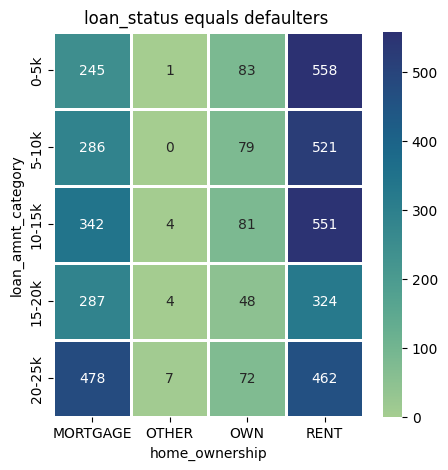

In [132]:
plt.figure(figsize=[5,5])
plt.title('loan_status equals defaulters ')
sns.heatmap(data=la1,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='d')
plt.show()

##### 3.Loan Amount vs grade  

[]

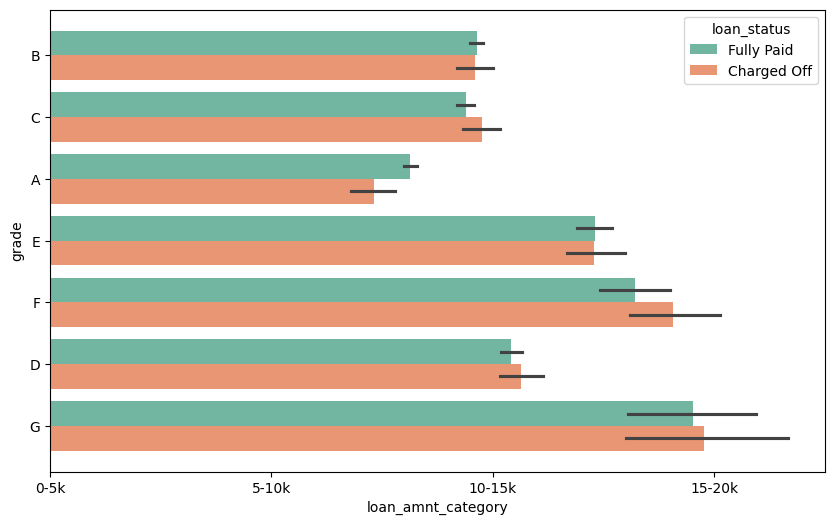

In [133]:
plt.figure(figsize=[10,6])
sns.barplot(data=loan,x='loan_amnt_category',y='grade',orient='h',hue='loan_status',palette=sns.color_palette("Set2"))
plt.plot()

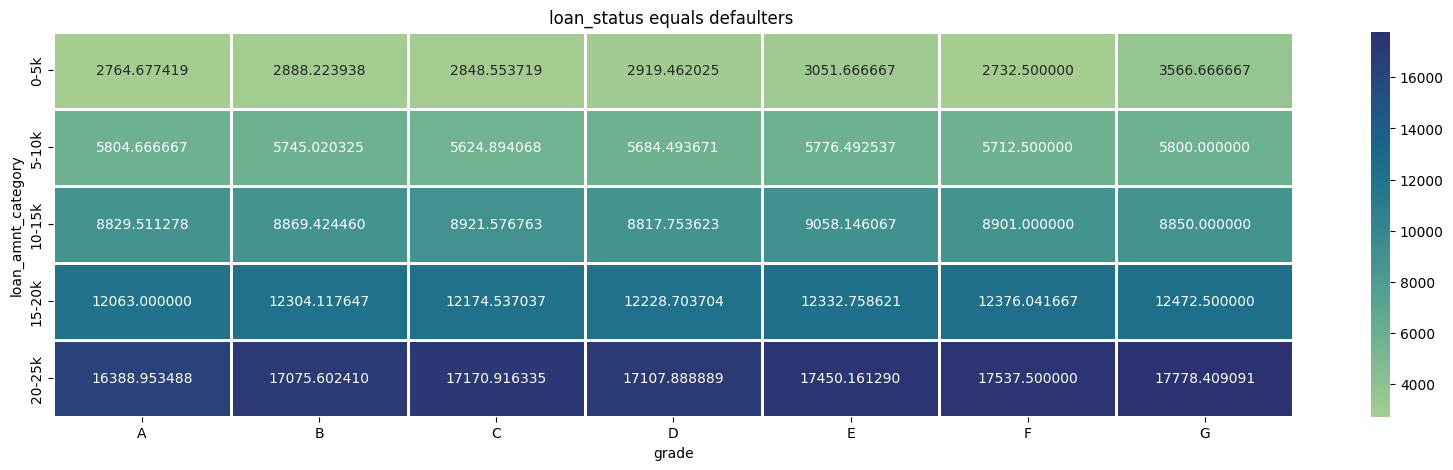

In [134]:
lag=loan[loan['loan_status']=='Charged Off'].pivot_table(index='loan_amnt_category',columns='grade',values='loan_amnt',aggfunc='mean')
plt.figure(figsize=[20,5])
plt.title('loan_status equals defaulters ')
sns.heatmap(data=lag,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='f')
plt.show()

##### 4.Loan Amount vs verification_status    

[]

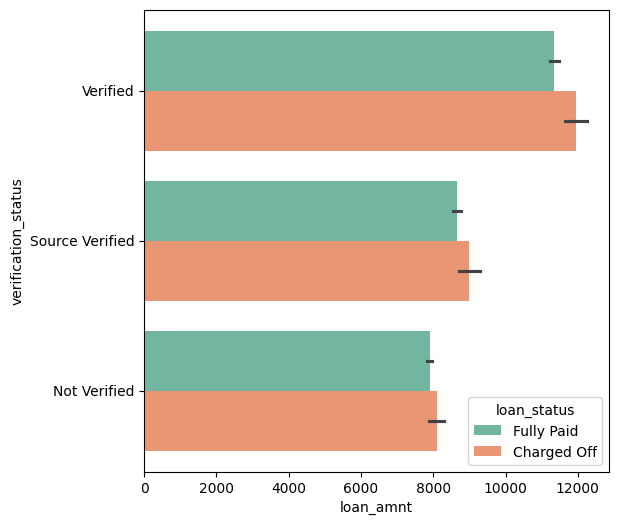

In [135]:
plt.figure(figsize=[6,6])
sns.barplot(data=loan,x='loan_amnt',y='verification_status',orient='h',hue='loan_status',palette=sns.color_palette("Set2"))
plt.plot()

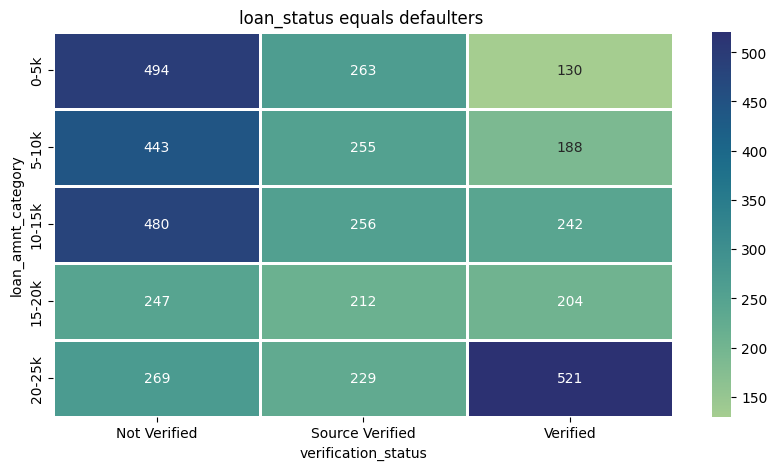

In [136]:
la2=loan[loan['loan_status']=='Charged Off'].pivot_table(index='loan_amnt_category',columns='verification_status',values='loan_amnt',aggfunc='count')
plt.figure(figsize=[10,5])
plt.title('loan_status equals defaulters ')
sns.heatmap(data=la2,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='d')
plt.show()

##### 5.Loan Amount vs month and year    

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

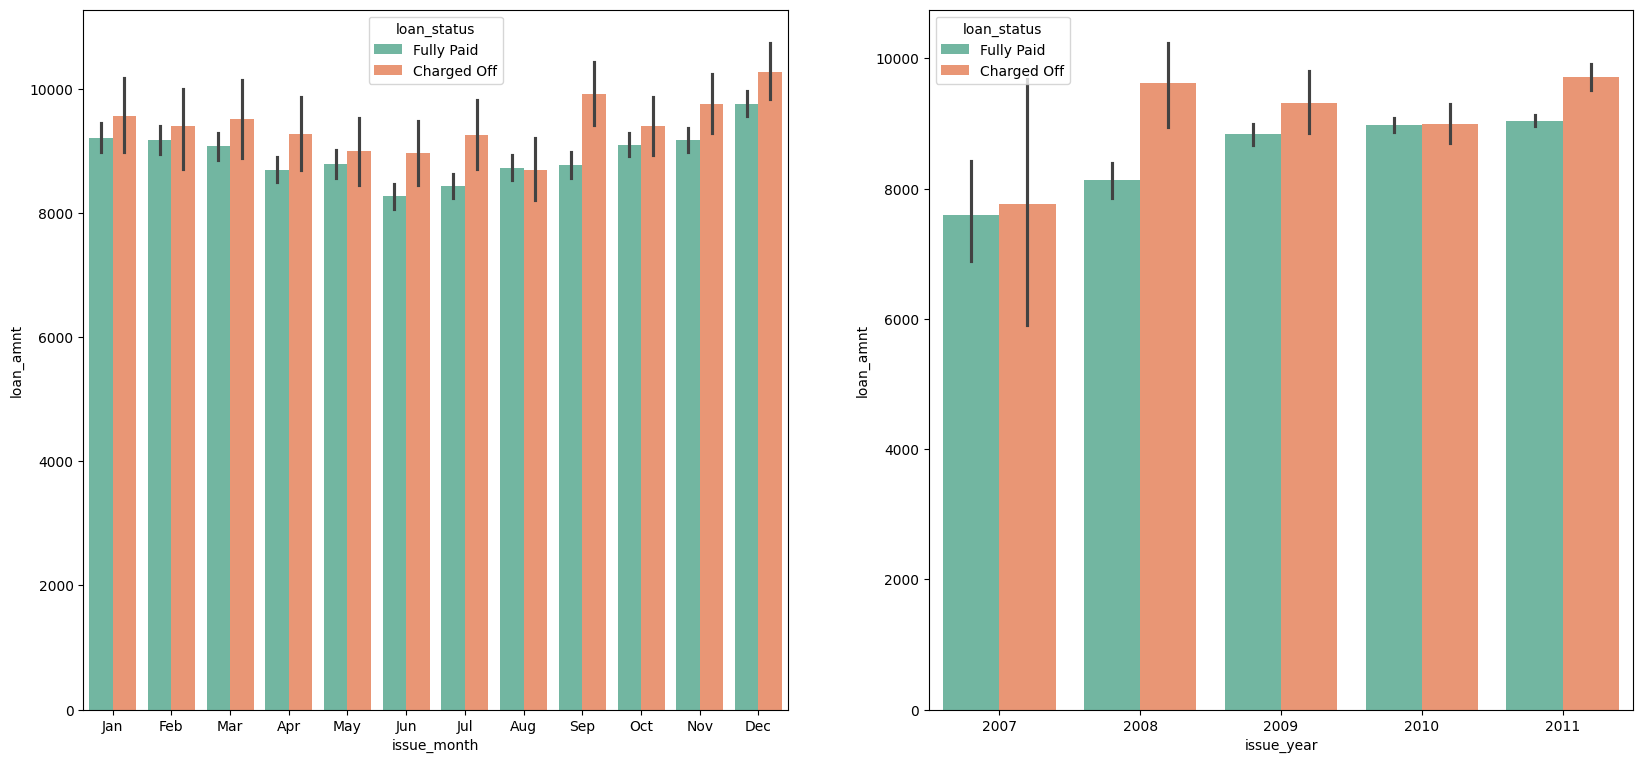

In [137]:
plt.figure(figsize=[20,20])
plt.subplot(221)
sns.barplot(data =loan,y='loan_amnt', x='issue_month', hue ='loan_status',palette="Set2",order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.subplot(222)
sns.barplot(data =loan,y='loan_amnt', x='issue_year', hue ='loan_status',palette="Set2",order=loan['issue_year'].sort_values().unique())

##### 6. loan amount vs interest rate

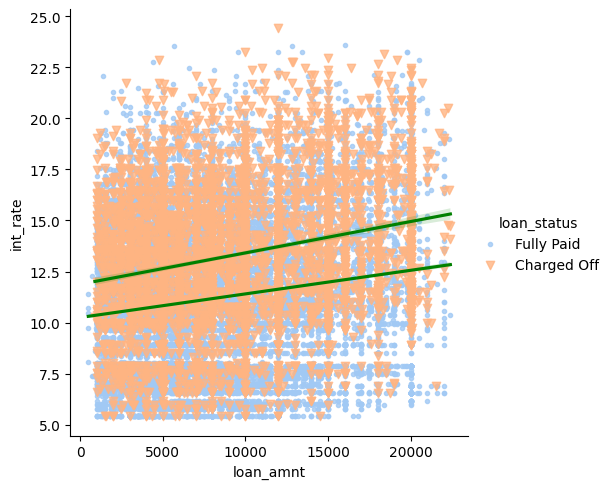

In [138]:
sns.lmplot(data=loan,x='loan_amnt',y='int_rate',hue='loan_status',markers= ['.','v'],line_kws={'color': 'Green'},palette='pastel')

[]

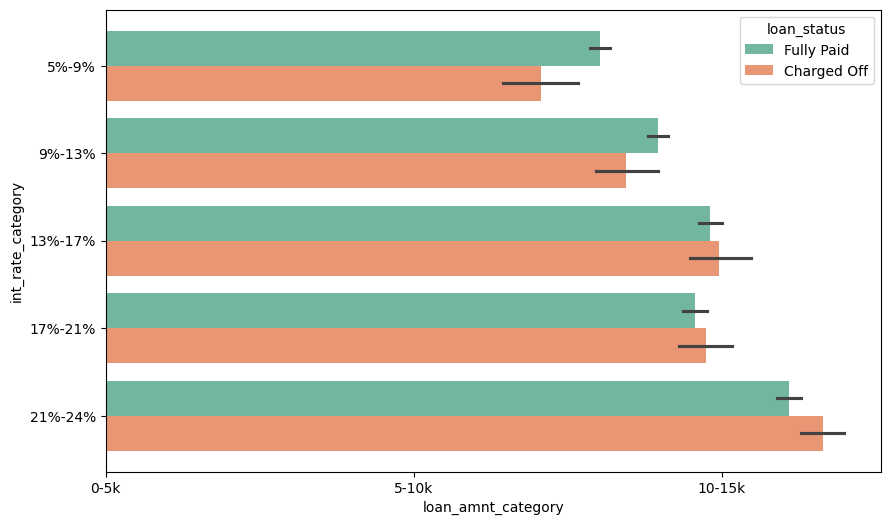

In [139]:
plt.figure(figsize=[10,6])
sns.barplot(data=loan,x='loan_amnt_category',y='int_rate_category',orient='h',hue='loan_status',palette=sns.color_palette("Set2"))
plt.plot()

In [140]:
la3=loan[loan['loan_status']=='Charged Off'].pivot_table(index='loan_amnt_category',columns='int_rate_category',values='loan_amnt',aggfunc='mean')

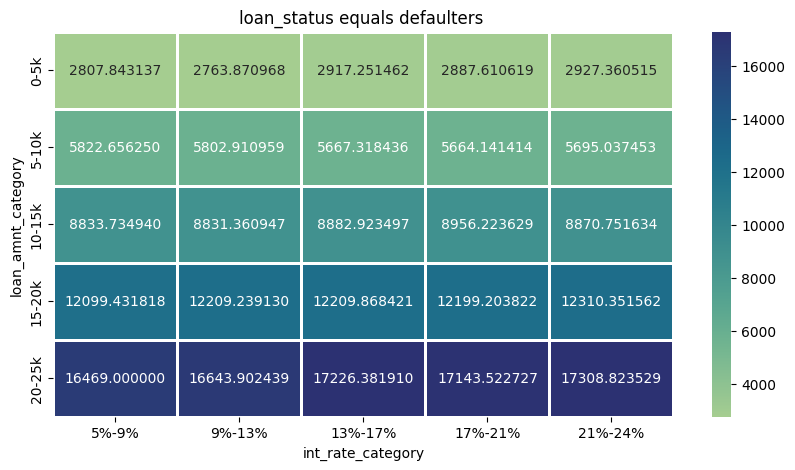

In [141]:
plt.figure(figsize=[10,5])
plt.title('loan_status equals defaulters ')
sns.heatmap(data=la3,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='f')
plt.show()

<h5><b>The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
This can be a pretty strong driving factor for loan defaulting </b></h5>

##### 7. loan amount vs term

[]

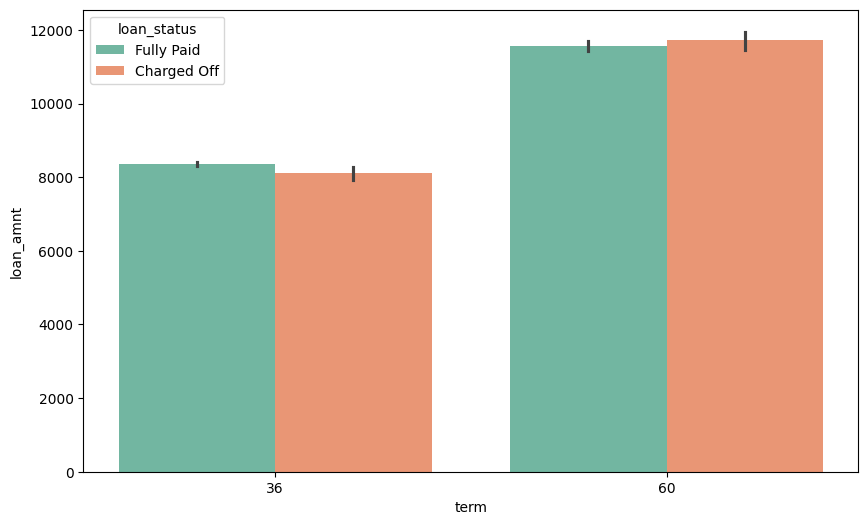

In [142]:
plt.figure(figsize=[10,6])
sns.barplot(data=loan,x='term',y='loan_amnt',orient='v',hue='loan_status',palette=sns.color_palette("Set2"))
plt.plot()

<h5><b>
Applicants who applied and defaulted have no significant difference in loan_amounts.
  
  1. For short terms the loan amount didn't exceeds 10k
  2. For long terms some people took loans  more than 10k
</b>
</h5>

##### 8. loan amount vs emp_length

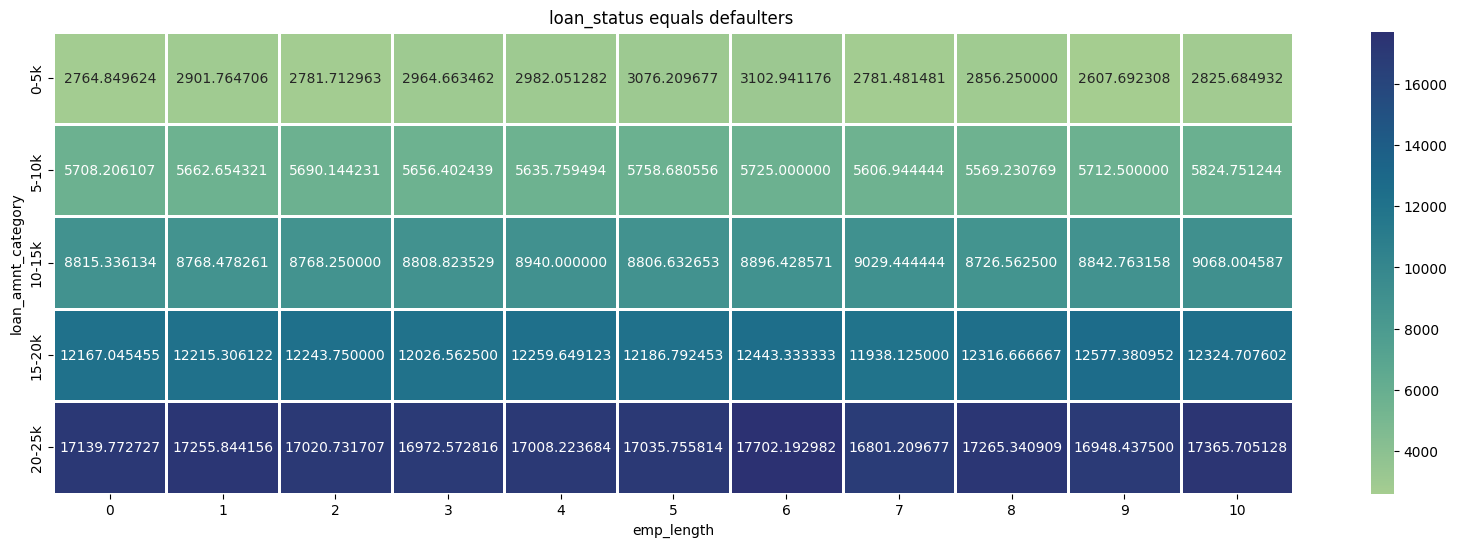

In [143]:
la4=loan[loan['loan_status']=='Charged Off'].pivot_table(index='loan_amnt_category',columns='emp_length',values='loan_amnt',aggfunc='mean')
plt.figure(figsize=[20,6])
plt.title('loan_status equals defaulters ')
sns.heatmap(data=la4,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='f')
plt.show()

##### 1. Annual income vs purpose

[]

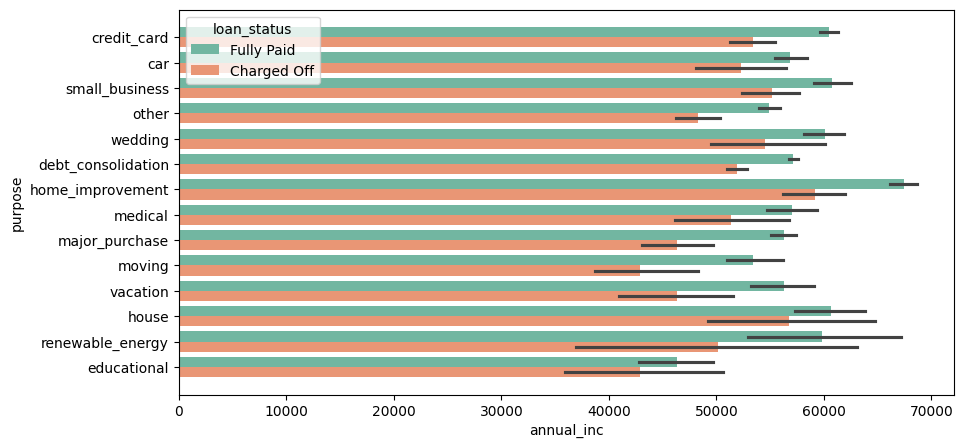

In [144]:
plt.figure(figsize=[10,5])
sns.barplot(data=loan,x='annual_inc',y='purpose',orient='h',hue='loan_status',palette=sns.color_palette("Set2"),estimator=np.mean)
plt.plot()

In [145]:
loan.groupby(['purpose'])['annual_inc'].mean()

purpose
car                   56333.064302
credit_card           59694.606821
debt_consolidation    56375.267646
educational           45725.000000
home_improvement      66427.405669
house                 60007.845614
major_purchase        55279.114058
medical               56139.205172
moving                51683.147348
other                 53883.720697
renewable_energy      57999.223529
small_business        59264.390282
vacation              54912.921053
wedding               59567.766585
Name: annual_inc, dtype: float64

In [146]:
loan.groupby(['purpose'])['annual_inc'].median()

purpose
car                   52000.0
credit_card           55000.0
debt_consolidation    52000.0
educational           40000.0
home_improvement      62002.0
house                 57600.0
major_purchase        50004.0
medical               50000.0
moving                46800.0
other                 50000.0
renewable_energy      53995.0
small_business        55257.5
vacation              50000.0
wedding               55100.0
Name: annual_inc, dtype: float64

[]

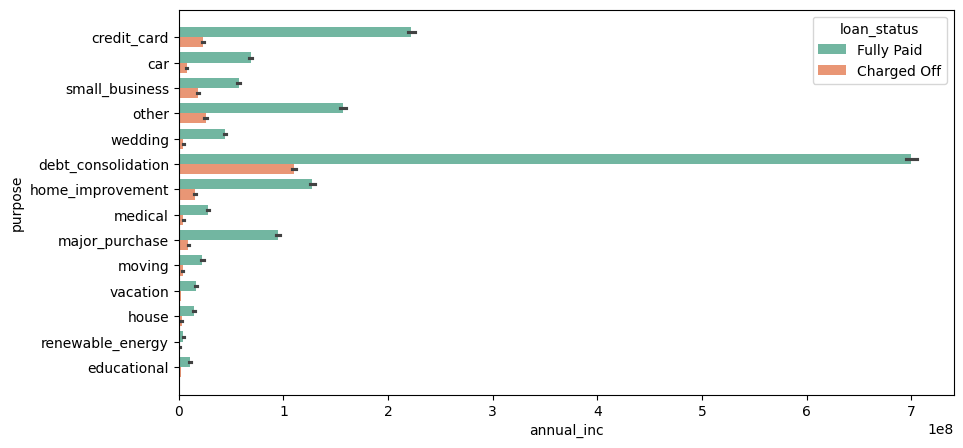

In [147]:
plt.figure(figsize=[10,5])
sns.barplot(data=loan,x='annual_inc',y='purpose',orient='h',hue='loan_status',palette=sns.color_palette("Set2"),estimator=np.sum)
plt.plot()

In [148]:
lp1=loan[loan['loan_status']=='Charged Off'].pivot_table(index='annual_inc_category',columns='purpose',values='annual_inc',aggfunc="count",fill_value=0)

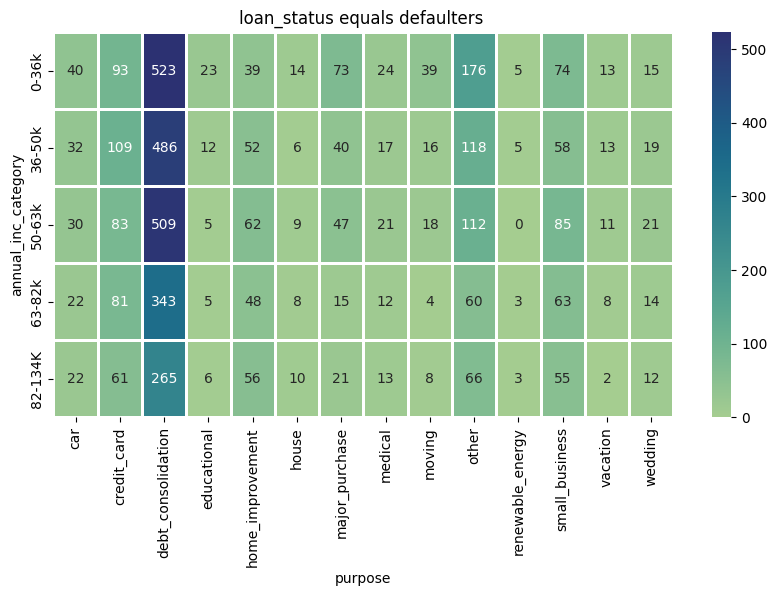

In [149]:
plt.figure(figsize=[10,5])
plt.title('loan_status equals defaulters ')
sns.heatmap(data=lp1,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='d')
plt.show()

<h5><b>Though the number of loans applied and defaulted are the highest in number for "debt consolidation" is the highest.<br>
The mean and median for different purpose are not good for this insite
If we change the estimator to count, we can see more number of people took loan for "debt consolidation" are in 0-36k annual salary range.
</b></h5>

##### 2.annual income vs home_ownership       

[]

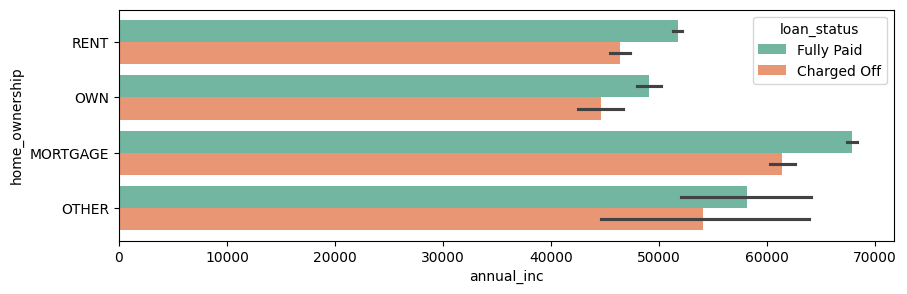

In [150]:
plt.figure(figsize=[10,3])
sns.barplot(data=loan,x='annual_inc',y='home_ownership',orient='h',hue='loan_status',palette=sns.color_palette("Set2"))
plt.plot()

In [151]:
lp2=loan[loan['loan_status']=='Charged Off'].pivot_table(index='annual_inc_category',columns='home_ownership',values='annual_inc',aggfunc="count",fill_value=0)

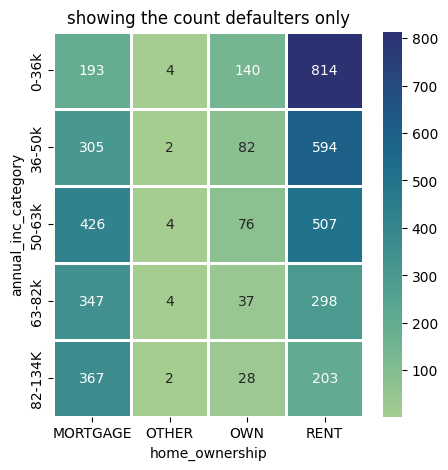

In [152]:
plt.figure(figsize=[5,5])
plt.title('showing the count defaulters only')
sns.heatmap(data=lp2,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='d')
plt.show()

##### 3.annual income vs grade   

[]

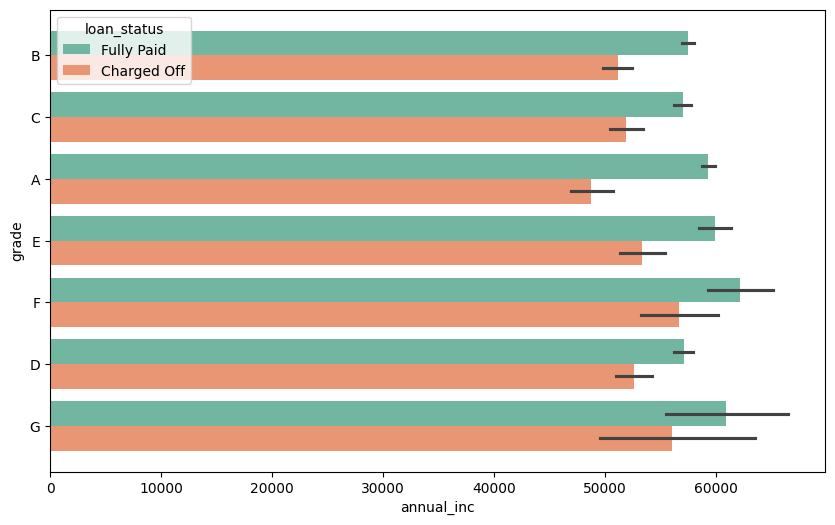

In [153]:
plt.figure(figsize=[10,6])
sns.barplot(data=loan,x='annual_inc',y='grade',orient='h',hue='loan_status',palette=sns.color_palette("Set2"))
plt.plot()

##### 4.annual income vs verification_status  

[]

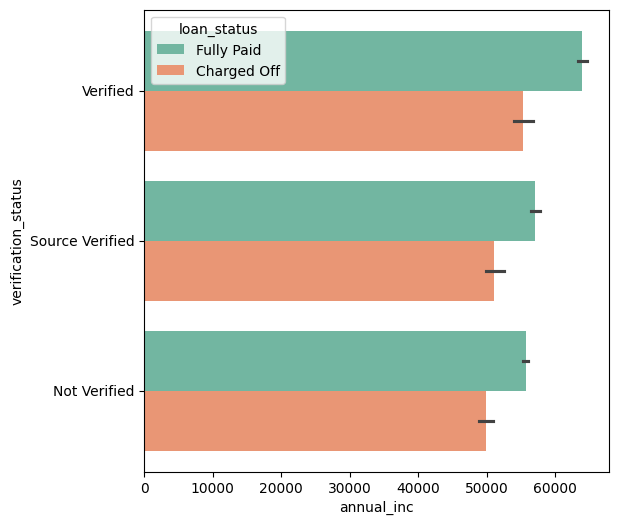

In [154]:
plt.figure(figsize=[6,6])
sns.barplot(data=loan,x='annual_inc',y='verification_status',orient='h',hue='loan_status',palette=sns.color_palette("Set2"))
plt.plot()

##### 5.annual income vs int rate

<Axes: xlabel='annual_inc', ylabel='int_rate_category'>

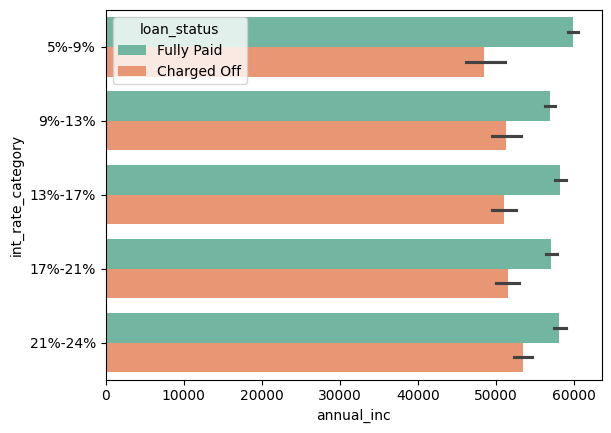

In [155]:
sns.barplot(data=loan,x='annual_inc',y='int_rate_category',hue='loan_status',palette='Set2')

##### 6. annual income vs loan amount

<Axes: xlabel='annual_inc_category', ylabel='loan_amnt'>

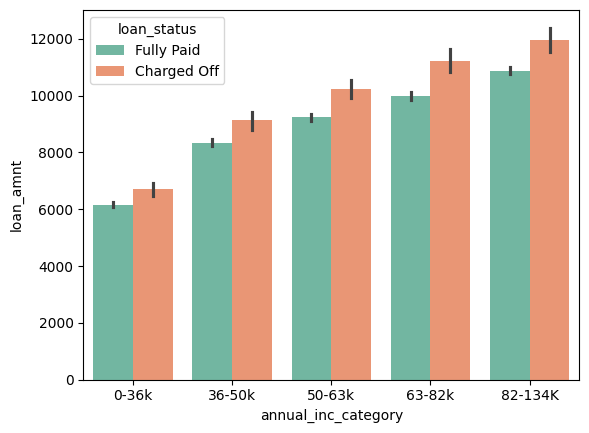

In [156]:
sns.barplot(data=loan,x='annual_inc_category',y='loan_amnt',hue='loan_status',palette='Set2')

<h5><b> As mentioned in the univariate analysis its seems there is other factors affecting the annual income.
people having the higher salary  also falls under defaulter list. 
<br> 1. The applicants who have taken high amount of loan  and 
<br>
     2. If the interest rate on a loan is high , he/she will more like to be fall under defaulter list
</b></h5>

##### 1 int_rate vs grade

<Axes: xlabel='grade', ylabel='int_rate'>

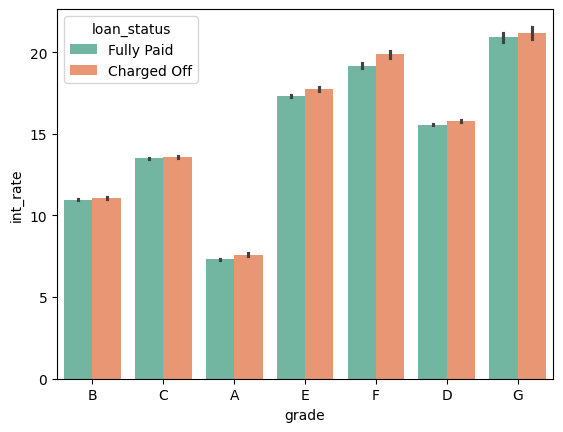

In [157]:
sns.barplot(data =loan,y ='int_rate', x ='grade', hue ='loan_status',palette="Set2")

##### 2. Int_rate vs term

<Axes: xlabel='term', ylabel='int_rate'>

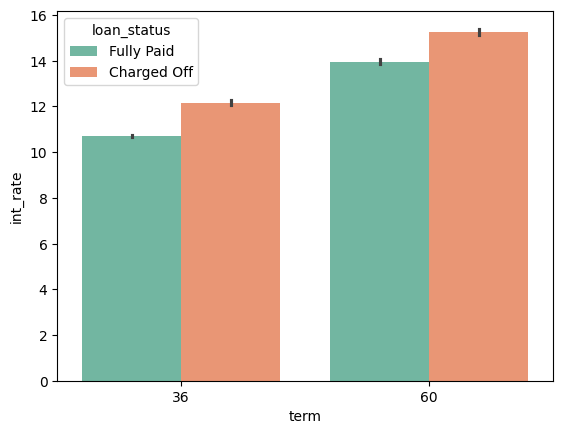

In [158]:
sns.barplot(data =loan,y ='int_rate', x ='term', hue ='loan_status',palette="Set2")

##### 3.int_rate vs purpose

<Axes: xlabel='int_rate', ylabel='purpose'>

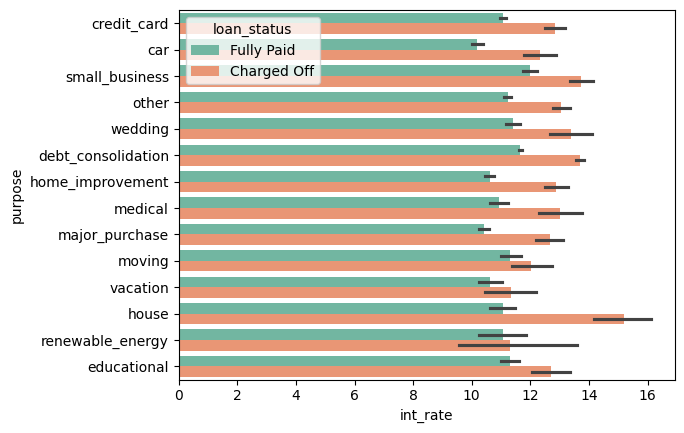

In [159]:
sns.barplot(data=loan,x='int_rate',y='purpose',hue='loan_status',palette='Set2')

<h5><b>
The people who has taken loans for any purpose in high interest rate are more likely to fall under  defaulter list
</b>
</h5>

In [160]:
lp3=loan[loan['loan_status']=='Charged Off'].pivot_table(index='annual_inc_category',columns='int_rate_category',values='loan_amnt',aggfunc='mean')

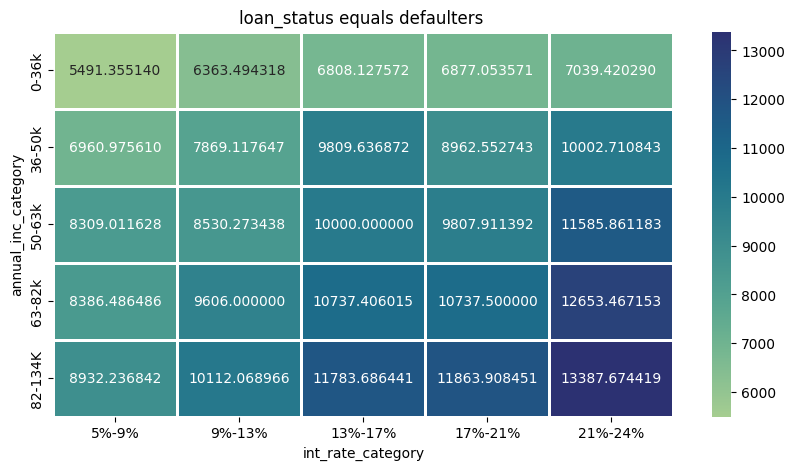

In [161]:
plt.figure(figsize=[10,5])
plt.title('loan_status equals defaulters ')
sns.heatmap(data=lp3,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='f')
plt.show()

In [167]:
loan.groupby(['term','loan_status']).size()

term  loan_status
36    Charged Off     2770
      Fully Paid     22070
60    Charged Off     1663
      Fully Paid      4923
dtype: int64

<Axes: xlabel='term', ylabel='count'>

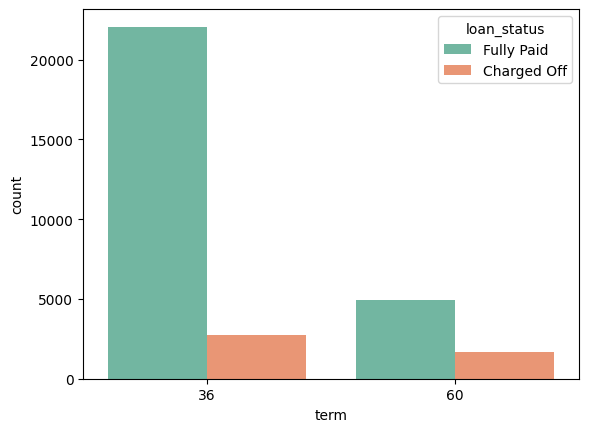

In [168]:
sns.countplot(x = 'term', hue='loan_status', data=loan,palette='Set2')

<h5><b>
loan status vs charged off proportions there is observed a high chance of being charged off for 36 months also high chance for fully paid 
</b>
<h5>

##### 1. dti vs annual_inc 

<Axes: xlabel='dti_category', ylabel='annual_inc_category'>

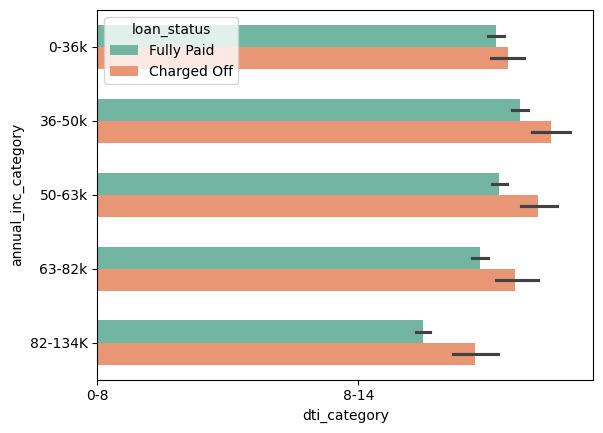

In [163]:
sns.barplot(data=loan,x='dti_category',y='annual_inc_category',palette='Set2',orient='h',width=0.6,hue='loan_status')

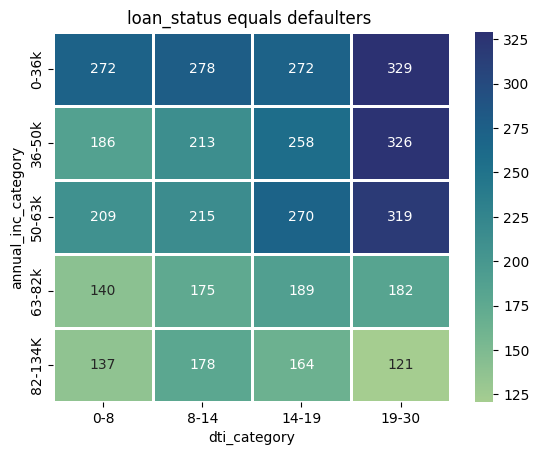

In [164]:
ldti=round(loan[loan['loan_status']=='Charged Off'].pivot_table(index='annual_inc_category',columns='dti_category',values='dti',aggfunc='count'))
plt.title('loan_status equals defaulters ')
sns.heatmap(data=ldti,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='d')
plt.show()

##### 2. dti vs loan_amnt

<Axes: xlabel='dti_category', ylabel='loan_amnt_category'>

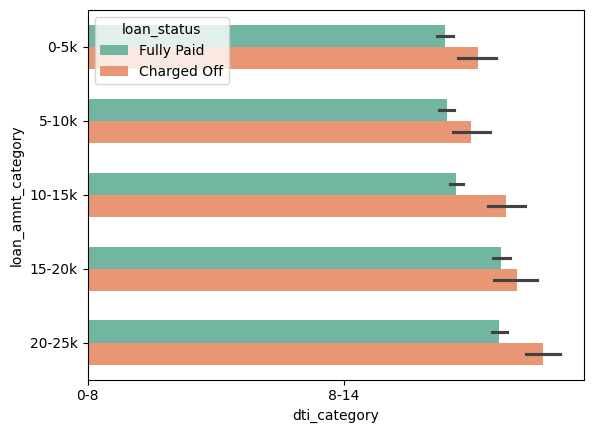

In [165]:
sns.barplot(data=loan,x='dti_category',y='loan_amnt_category',palette='Set2',orient='h',width=0.6,hue='loan_status')

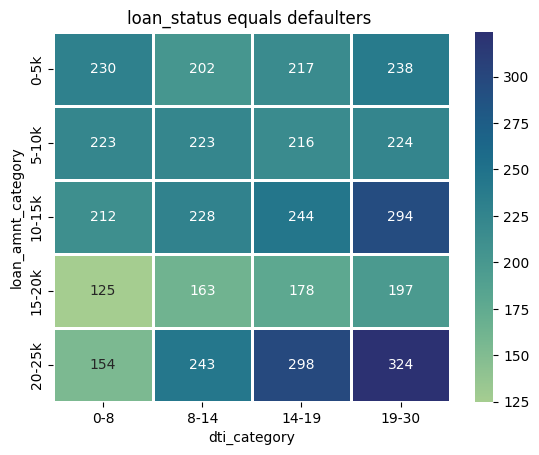

In [166]:
ldti2=round(loan[loan['loan_status']=='Charged Off'].pivot_table(index='loan_amnt_category',columns='dti_category',values='dti',aggfunc='count'),2)
plt.title('loan_status equals defaulters ')
sns.heatmap(data=ldti2,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='d')
plt.show()

##### purpose vs  charged off proportions

In [169]:
purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,335,941,1276,0.262539
10,renewable_energy,16,69,85,0.188235
3,educational,51,236,287,0.177700
8,moving,85,424,509,0.166994
5,house,47,238,285,0.164912
9,other,532,2855,3387,0.157071
7,medical,87,493,580,0.150000
2,debt_consolidation,2126,12240,14366,0.147988
12,vacation,47,295,342,0.137427
4,home_improvement,257,1895,2152,0.119424


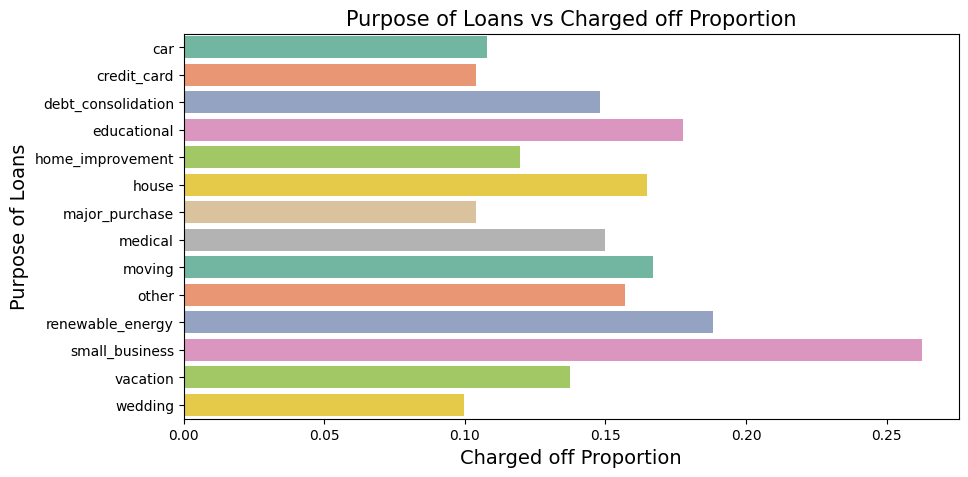

In [173]:
fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='white')
ax1.set_title('Purpose of Loans vs Charged off Proportion',fontsize=15,color = 'black')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan,palette='Set2')
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='black')
ax1.set_xlabel('Charged off Proportion',fontsize=14,color = 'black')
plt.show()

#### Observations

##### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 
<h5 style={text_color:'red'}>
    
- Applicants who taken higher loan amount for 'debt consolidation' .
- Applicants who have taken a loan in the range 20-25K and are charged interest rate of 21-24%
- Applicants who have taken a loan in the range 20-25K and are under VERIFIED status.
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is G and loan amount is between 20k-25k
- When employment length is 10yrs and loan amount is 20k-25k.

- Applicants taking loan for 'debt consolidation' and have income of 0-36k.
- Applicants who receive's loan at 21-24% with low annual income range of 0-36k.
- Applicants whose home ownership is RENT and have income

- Applicants whose dti rate is in 19-30 range and  annual income range of 36-50k.
- Applicants whose dti rate is in 19-30 range and  loan amount range of 20-25k.
- We have calculated the proportion of each loan purpose which are marked as Charged Off it seems that we got high proportion for small business.
- When comparing the loan status vs charged off proportions there is observed a high chance of being charged off for 36 month  also high chance for fully paid


</h5>